In [17]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('islander_data.csv')

exp_sample = df.groupby('Drug').sample(30, replace=True)
print(exp_sample.value_counts('Drug'))

Drug
A    30
S    30
T    30
Name: count, dtype: int64


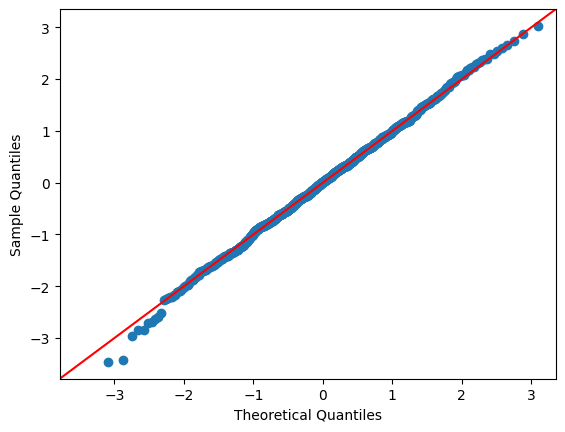

In [4]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

normal_data = np.random.normal(0,1, 1000)

sm.qqplot(normal_data, line='45')
plt.show()

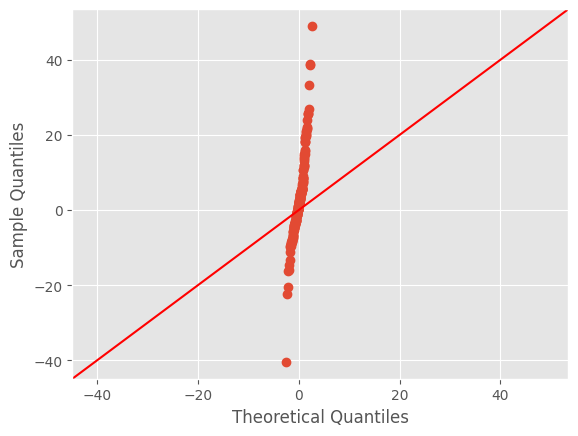

In [19]:
sm.qqplot(df['Diff'], line='45') #проверяем нормальность распределения. по красной линии - идеал нормального
plt.show()

<Axes: title={'center': 'Diff'}, xlabel='Happy_Sad_group'>

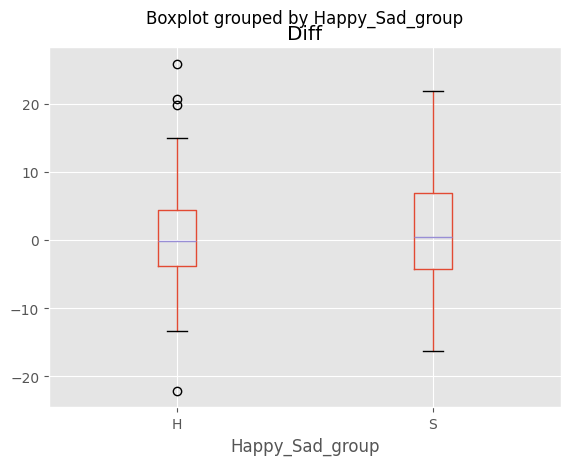

In [20]:
exp_sample.boxplot(by = 'Happy_Sad_group', column =['Diff'], grid = True)

<Axes: title={'center': 'Diff'}, xlabel='Drug'>

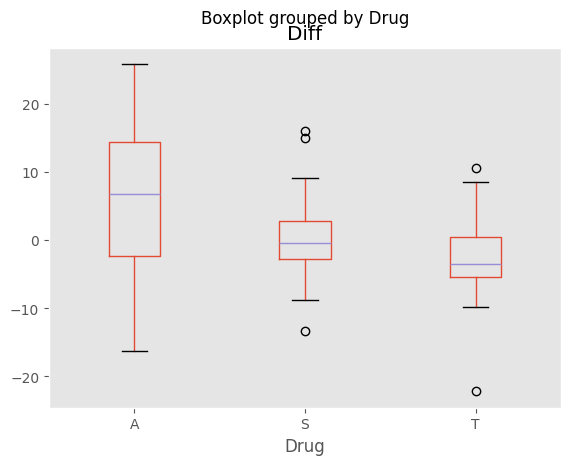

In [21]:
exp_sample.boxplot(by = 'Drug', column =['Diff'], grid = False)


(<Figure size 640x480 with 3 Axes>, {('1', 'H'): (0.0, np.float64(0.0), 0.35203520352035206, np.float64(0.4983388704318937)), ('1', 'S'): (0.0, np.float64(0.5016611295681063), 0.35203520352035206, np.float64(0.4983388704318937)), ('3', 'H'): (0.356985698569857, np.float64(0.0), 0.25302530253025307, np.float64(0.520005777841976)), ('3', 'S'): (0.356985698569857, np.float64(0.5233280369781885), 0.25302530253025307, np.float64(0.4766719630218113)), ('2', 'H'): (0.614961496149615, np.float64(0.0), 0.38503850385038496, np.float64(0.6549596582819174)), ('2', 'S'): (0.614961496149615, np.float64(0.6582819174181299), 0.38503850385038496, np.float64(0.3417180825818699))})


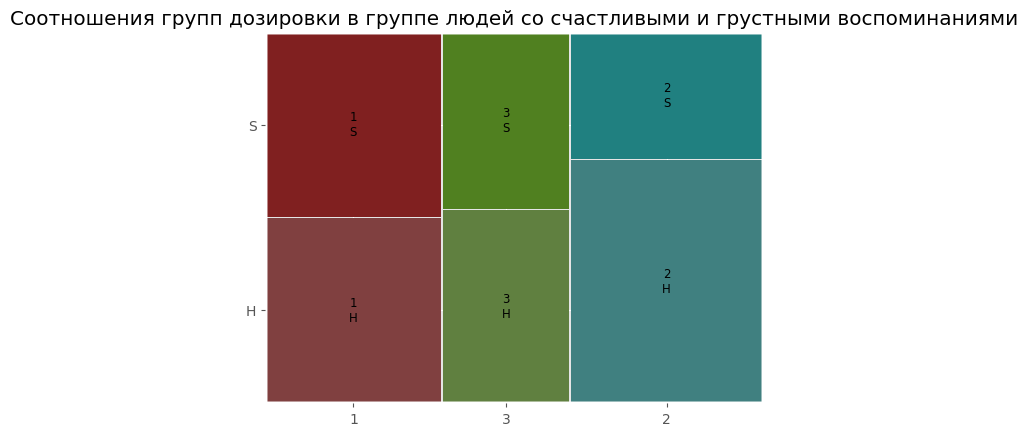

In [22]:
from statsmodels.graphics.mosaicplot import mosaic
print(mosaic(exp_sample, ['Dosage','Happy_Sad_group'], title = 'Соотношения групп дозировки в группе людей со счастливыми и грустными воспоминаниями'))

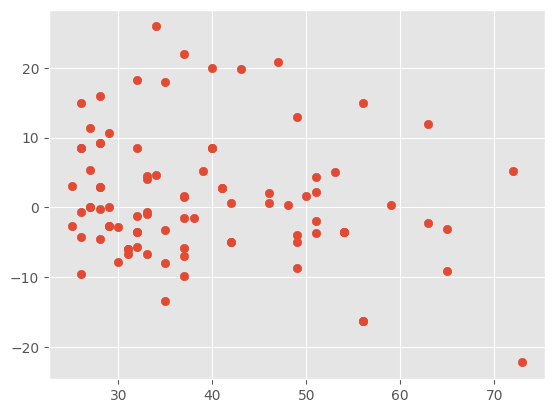

In [23]:
plt.scatter(exp_sample['age'], exp_sample['Diff'])
plt.show()

In [24]:
k, b = np.polyfit(exp_sample['age'], exp_sample['Diff'], 1) # линейная регрессия

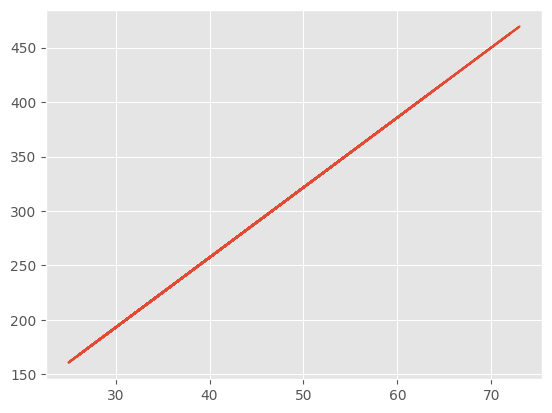

In [25]:
plt.plot(exp_sample['age'], k*(exp_sample['age'])+b*exp_sample['age'] )

In [26]:
a = np.corrcoef(df['age'], df['Diff'], 1)[0][1]
a

np.float64(-0.009293328126756114)

In [3]:
import pandas as pd
df = pd.read_csv('Patient Survival.csv')
df = df.groupby('Treated_with_drugs').sample(500)
# df.shape
df = df[['Patient_Age', 'Patient_Body_Mass_Index', 'Patient_Smoker', 'Diagnosed_Condition', 'Survived_1_year']]
print(df.shape)

(1000, 5)


In [4]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

nm = np.random.normal(0, 1, 1000)

# sm.qqplot(df['Diagnosed_Condition'], line='45')
df['Diagnosed_Condition'].max()

np.int64(52)

In [29]:
from scipy.stats import shapiro # Критерий Шапиро - проверяем нормальность распределения среднего выборки
n = 0                           # H0 - распределено нормально. далее в ттесте есть отдельный флаг для этого
nums = []
while n < 500:
    n += 1
    sample = df[df['Patient_Smoker'] == 'YES'].sample(100)['Diagnosed_Condition'].mean()
    nums.append(sample)
shapiro(nums)

ShapiroResult(statistic=np.float64(0.9988993772632974), pvalue=np.float64(0.9915404969595836))

In [30]:
n = 0
nums = []
while n < 500:
    n += 1
    sample = df[df['Patient_Smoker'] == 'NO'].sample(100)['Diagnosed_Condition'].mean()
    nums.append(sample)
shapiro(nums)

ShapiroResult(statistic=np.float64(0.9953508744433827), pvalue=np.float64(0.14118726958850475))

In [31]:
from scipy.stats import levene # критейрий левена. H0 - дисперсии одинаковы в выборках
s1 = df[df['Patient_Smoker'] == 'NO'].sample(100)['Diagnosed_Condition']
s2 = df[df['Patient_Smoker'] == 'YES'].sample(100)['Diagnosed_Condition']
levene(s1, s2)


LeveneResult(statistic=np.float64(0.0646939918875914), pvalue=np.float64(0.7994890273080355))

In [32]:
from scipy.stats import ttest_ind
ttest_ind(df[df['Patient_Smoker'] == 'NO']['Diagnosed_Condition'], df[df['Patient_Smoker'] == 'YES']['Diagnosed_Condition'], equal_var=True)

TtestResult(statistic=np.float64(-0.9301743083084053), pvalue=np.float64(0.3525057785691026), df=np.float64(998.0))

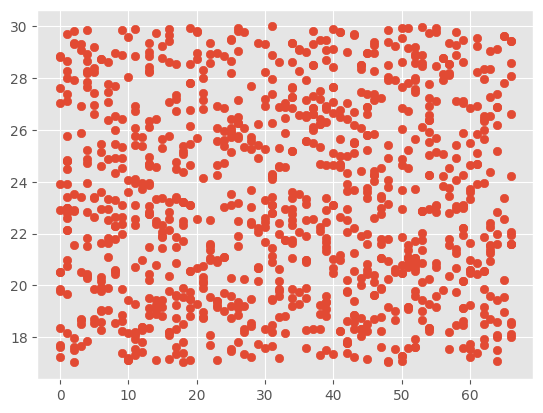

In [33]:
plt.scatter(df['Patient_Age'], df['Patient_Body_Mass_Index'])

array([[1.        , 0.02059896],
       [0.02059896, 1.        ]])

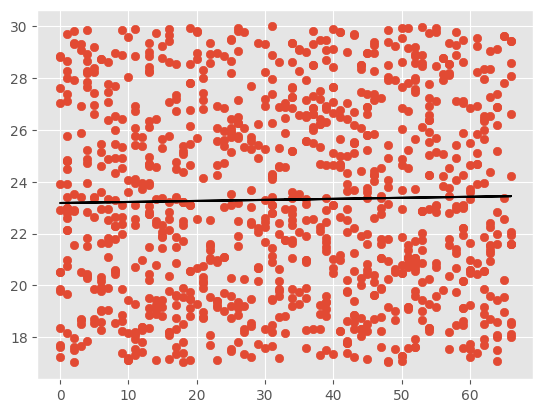

In [34]:
plt.scatter(df['Patient_Age'], df['Patient_Body_Mass_Index'])
a, b = np.polyfit(x = df['Patient_Age'], y = df['Patient_Body_Mass_Index'], deg=1)
plt.plot(df['Patient_Age'], a*df['Patient_Age'] + b, color='black')
q = np.corrcoef(x = df['Patient_Age'], y = df['Patient_Body_Mass_Index'])
# plt.show()
q

## Линейная регрессия
Уравнение линейной регрессии
Тип: Параметрический.

Применяется: когда мы хотим оценить связь между зависимой переменной и одной или несколькими независимыми переменными.

Проверяет: есть ли связь между зависимой переменной и каждой из независимых переменных.

Данные: хотя бы две переменных, одна из которых зависимая.

Нулевая гипотеза: коэффициент при каждой из независимых переменных равен нулю (т.е. нет связи между зависимой и независимой переменной).

Дисперсия остатков регрессии — сумма квадратов разниц между фактическими и предсказанными линейной регрессией значениями зависимой переменной.
RSS — расшифровывается как Residual Sum of Squares

Чтобы вычислить коэффициент детерминации, мы возьмём среднее значение зависимой переменной (середина оси y) и проведём горизонтальную линию. Для этой линии нам тоже нужно высчитать RSS (в этом случае мы назовём его TSS). Затем сравнить его с RSS каждой линии и решить пропорцию:

RSS_L1/TSS = x%/100%

RSS_L2/TSS = x%/100%

RSS_L3/TSS = x%/100%

RSS_L4/TSS = x%/100%

То есть, мы найдём x для каждого уравнения и сравним их между собой. Чем он выше, тем лучше наша модель объясняет изменчивость зависимой переменной.

🔍 Коэффициент детерминации — доля дисперсии зависимой переменной, объясняемая рассматриваемой моделью.

И последнее, что тут стоит сказать — на практике коэффициент детерминации редко превышает 8%. А ещё у него есть второе имя — «Эр-квадрат».

Допущения:

1. Линейная зависимость
Между независимой и зависимой переменной есть линейная связь

2. Тип переменных 
Должны быть непрерывными или категориальными

3. Наличие вариации
Без вариации не может быть модели

4. Отсутствие мультиколлинеарности
Независимые переменны не должны быть связаны друг с другом

5. Отсутствие внешних переменных
Не должно быть переменных, которые коррелируют одновременно с двумя независимыми переменными в модели

5. Гомоскедастичность. Гомоскедастичность — непостоянная дисперсия случайной ошибки для разных наблюдений.
Дисперсия остатков должна быть постоянной

6. Независимость наблюдений
Наблюдения должны быть независимы друг от друга

In [35]:
df = pd.read_csv('Spotify_Youtube.csv')

df = df[['Duration_ms', 'Danceability', 'Loudness', 'Speechiness', 'Energy']].dropna()
df['Duration'] = df['Duration_ms'] / 1000
df = df[(df['Duration'] < 300) & (df['Duration'] > 30)]
# np.nan(df['Duration'])

# df.columns

In [36]:
df = df[['Duration_ms', 'Danceability', 'Loudness', 'Speechiness', 'Energy']].dropna()

In [37]:
print(df.describe())

         Duration_ms  Danceability      Loudness   Speechiness        Energy
count   18646.000000  18646.000000  18646.000000  18646.000000  18646.000000
mean   206110.522150      0.626312     -7.536997      0.097840      0.638738
std     45703.952142      0.161589      4.577807      0.113562      0.213155
min     30985.000000      0.000000    -46.251000      0.000000      0.000055
25%    176144.000000      0.527000     -8.649750      0.035900      0.511000
50%    207264.500000      0.643000     -6.422000      0.051300      0.670000
75%    237559.000000      0.744000     -4.860000      0.107000      0.801000
max    299960.000000      0.975000      0.920000      0.964000      1.000000


In [38]:
import statsmodels.api as sm # Линейная регрессия.
from statsmodels.regression.linear_model import OLS
X = df[['Danceability', 'Loudness', 'Speechiness', 'Energy']]
X = sm.add_constant(X, prepend=False)  #добавляем b_0
Y = df['Duration_ms']

model = OLS(Y, X)
res = model.fit()
res.summary()
# R-squared — это коэффициент детерминации;
# колонка coef с коэффициентами b;
# колонка P>|t| с p_value — его мы используем для оценки значимости коэффициента.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Duration_ms   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     225.9
Date:                Fri, 06 Dec 2024   Prob (F-statistic):          1.01e-189
Time:                        22:23:16   Log-Likelihood:            -2.2609e+05
No. Observations:               18646   AIC:                         4.522e+05
Df Residuals:                   18641   BIC:                         4.522e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Danceability -2.752e+04   2208.324    -12.463      0.000   -3.19e+04   -2.32e+04
Loudness      2039.6970    110.773     18.413      0.000    1822.572    2256.822
Speechiness  -3.976e+04   2953.889    -13.461      0.000   -4.56e+04    -3.4e+04
Energy       -3977.6190   2287.915     -1.739      0.082   -8462.141     506.903
const         2.452e+05   2711.798     90.402      0.000     2.4e+05     2.5e+05
==============================================================================
Omnibus:                       69.121   Durbin-Watson:                   1.304
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.670
Skew:                          -0.147   Prob(JB):                     7.44e-16
Kurtosis:                       2.938   Cond. No.                         97.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

видно, что pvalue у energy что-то высокое, давайте его исключим

In [39]:
X = df[['Danceability', 'Loudness', 'Speechiness']]
Y = df['Duration_ms']

X = sm.add_constant(X, prepend=False)

model = OLS(Y, X)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            Duration_ms   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     300.2
Date:                Fri, 06 Dec 2024   Prob (F-statistic):          2.43e-190
Time:                        22:23:16   Log-Likelihood:            -2.2609e+05
No. Observations:               18646   AIC:                         4.522e+05
Df Residuals:                   18642   BIC:                         4.522e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Danceability -2.727e+04   2203.625    -12.375   

R-squared совсем не поменялся - значит мы удалили верно ненужную переменну

In [40]:
X = df[['Danceability']]
Y = df['Duration_ms']

X = sm.add_constant(X, prepend=False)

model = OLS(Y, X)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            Duration_ms   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     49.39
Date:                Fri, 06 Dec 2024   Prob (F-statistic):           2.17e-12
Time:                        22:23:16   Log-Likelihood:            -2.2650e+05
No. Observations:               18646   AIC:                         4.530e+05
Df Residuals:                   18644   BIC:                         4.530e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Danceability -1.454e+04   2068.706     -7.028   

А тут мы удалили слишком много, потому коэф стал слишком маленьким...

Проверим допущение о мультиколлинеарности. Переменные не должны быть коррелированы между друг другом. Мы можем использовать VIF (Variance Inflation Factor). Если он будет больше четырех (ещё одно консенсусное значение, такое же как p-value или минимальное число наблюдений в группе), то это значит, что эта переменная коррелирована с какой-то из присутствующих и её нужно убрать из модели.

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['Danceability', 'Loudness', 'Speechiness']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

        feature       VIF
0  Danceability  3.283729
1      Loudness  2.593200
2   Speechiness  1.822876


### Логистическая регрессия
#
(бинарная логистическая регрессия)
##
Логистическая регрессия — это тип регрессии, в которой мы оцениваем наличие связи между бинарной зависимой переменной и одной или несколькими независимыми переменными.


Оценка логистической регрессии

Тип: непараметрический.

Применяется: когда мы хотим оценить связь между бинарной зависимой переменной и одной или несколькими независимыми переменными.

Проверяет: есть ли связь между бинарной переменной и каждой из независимых переменных.

Данные: зависимая переменная, которая принимает два значения, и независимые переменная.

Нулевая гипотеза: коэффициент при каждой из независимых переменных равен нулю (т.е. нет связи между зависимой и независимой переменной).

##
Допущения:

зависимая переменная должна быть бинарной, обычно её кодируют как ноль и один;

независимость наблюдений друг от друга;

отсутствие мультиколлинеарности;

достаточный размер выборки (хотя бы тридцать наблюдений);

отсутствие выбросов.



Правдоподобие измеряется псевдо-R^2 McFadden. Ориентируемся на 0.2

Точность можно визуализировать через ROC-кривую


Расстояние между пересекающей прямой и кривой гораздо больше. Этот график визуализирует показатель AUROC (Area Under Receiving Operating Characteristic) — площадь под ROC-кривой. Он распределен от 0.5 до 1. По факту ситуации, когда AUROC = 1 не случается.

🔍AUROC — показатель, отражающий насколько точно непрерывная переменная предсказывает зависимую переменную в логистической модели.

Можно сказать, что переменная удовлетворительно предсказывает зависимую переменную при AUROC >= 0.8

In [42]:

import pandas as pd
df = pd.read_csv('character_predictions_pose.csv')
df

,s_no,plod,name,title,male,culture,dateofbirth,dateofdeath,mother,father,...,isaliveheir,isalivespouse,ismarried,isnoble,age,numdeadrelations,booldeadrelations,ispopular,popularity,isalive
0,1,0.946,Viserys II Targaryen,NaN,True,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,...,False,NaN,False,False,NaN,11,True,True,0.605351,False
1,2,0.613,Walder Frey,Lord of the Crossing,True,Rivermen,208.0,NaN,NaN,NaN,...,NaN,True,True,True,97.0,1,True,True,0.896321,True
2,3,0.507,Addison Hill,Ser,True,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,True,NaN,0,False,False,0.267559,True
3,4,0.924,Aemma Arryn,Queen,False,NaN,82.0,105.0,NaN,NaN,...,NaN,False,True,True,23.0,0,False,False,0.183946,False
4,5,0.383,Sylva Santagar,Greenstone,False,Dornish,276.0,NaN,NaN,NaN,...,NaN,True,True,True,29.0,0,False,False,0.043478,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,1942,0.197,Luwin,NaN,True,Westeros,NaN,299.0,NaN,NaN,...,NaN,NaN,False,False,NaN,0,False,True,0.351171,False
1942,1943,0.013,Reek,NaN,True,NaN,NaN,299.0,NaN,NaN,...,NaN,NaN,False,False,NaN,0,False,False,0.096990,False
1943,1944,0.480,Symeon Star-Eyes,NaN,True,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,False,NaN,0,False,False,0.030100,True
1944,1945,0.363,Coldhands,NaN,True,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,False,NaN,0,False,False,0.130435,True


In [43]:
got = df[['isalive', 'male', 'ismarried', 'numdeadrelations', 'isnoble', 'popularity']]
print(got)


      isalive   male  ismarried  numdeadrelations  isnoble  popularity
0       False   True      False                11    False    0.605351
1        True   True       True                 1     True    0.896321
2        True   True      False                 0     True    0.267559
3       False  False       True                 0     True    0.183946
4        True  False       True                 0     True    0.043478
...       ...    ...        ...               ...      ...         ...
1941    False   True      False                 0    False    0.351171
1942    False   True      False                 0    False    0.096990
1943     True   True      False                 0    False    0.030100
1944     True   True      False                 0    False    0.130435
1945    False   True       True                 4     True    0.210702

[1946 rows x 6 columns]


преобразовываем в категориальные переменные

In [44]:
got['isalive'] = got['isalive'].astype('int')
got['male'] = got['male'].astype('int')
got['isnoble'] = got['isnoble'].astype('int')
got['ismarried'] = got['ismarried'].astype('int')
got

/tmp/ipykernel_107298/1358901465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  got['isalive'] = got['isalive'].astype('int')
/tmp/ipykernel_107298/1358901465.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  got['male'] = got['male'].astype('int')
/tmp/ipykernel_107298/1358901465.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

,isalive,male,ismarried,numdeadrelations,isnoble,popularity
0,0,1,0,11,0,0.605351
1,1,1,1,1,1,0.896321
2,1,1,0,0,1,0.267559
3,0,0,1,0,1,0.183946
4,1,0,1,0,1,0.043478
...,...,...,...,...,...,...
1941,0,1,0,0,0,0.351171
1942,0,1,0,0,0,0.096990
1943,1,1,0,0,0,0.030100
1944,1,1,0,0,0,0.130435


Несбалансированность данных — свойство распределения категориальных данных, где один класс представлен существенно больше, чем все остальные в выборке.

[Text(0.5, 1.0, 'Пропорция выживших персонажей'),
 Text(0.5, 0, 'Персонаж выжил?'),
 Text(0, 0.5, 'Количество')]

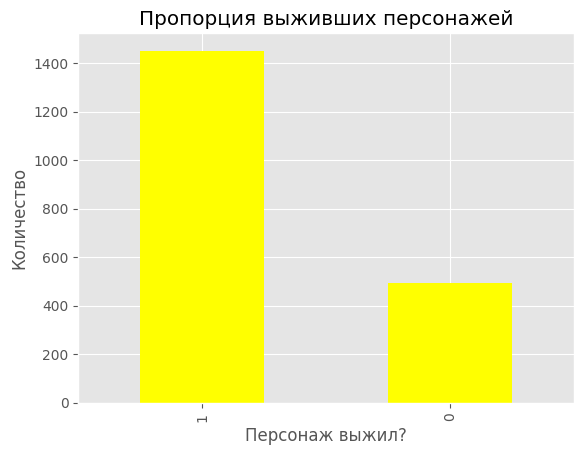

In [45]:
got['isalive'].value_counts().plot(kind='bar', color='yellow').set(title='Пропорция выживших персонажей', xlabel='Персонаж выжил?', ylabel='Количество') #смотрим на распределение зависимой переменной


<Axes: xlabel='male'>

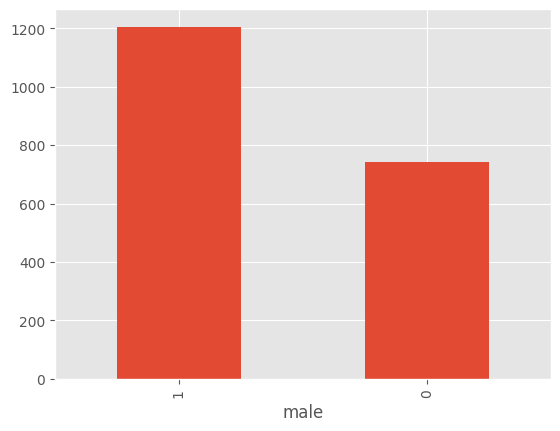

In [46]:
got['male'].value_counts().plot(kind='bar')

[Text(0.5, 1.0, 'Пропорция замужних персонажей'),
 Text(0.5, 0, 'Супруг(а) у персонажа'),
 Text(0, 0.5, 'Количество')]

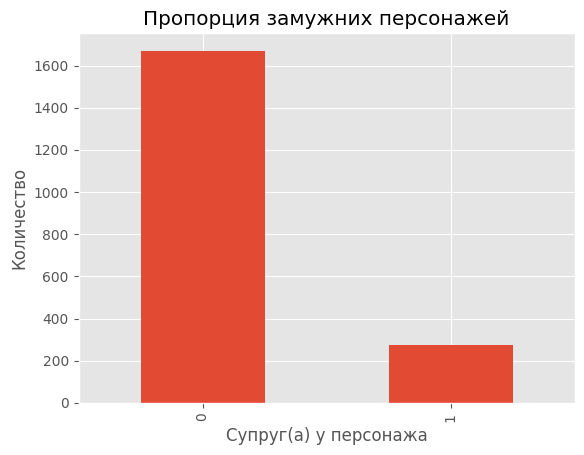

In [47]:
got['ismarried'].value_counts().plot(kind='bar').set(title='Пропорция замужних персонажей', xlabel='Супруг(а) у персонажа', ylabel='Количество')


какая-то смещенная выборка, но попробуем ее использовать


[Text(0.5, 1.0, 'Пропорция титулованных персонажей'),
 Text(0.5, 0, 'Дворянский титул персонажа'),
 Text(0, 0.5, 'Количество')]

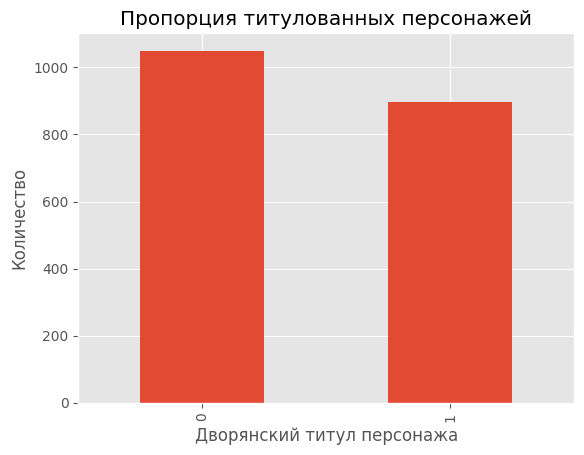

In [48]:
got['isnoble'].value_counts().plot(kind='bar').set(title='Пропорция титулованных персонажей', xlabel='Дворянский титул персонажа', ylabel='Количество')


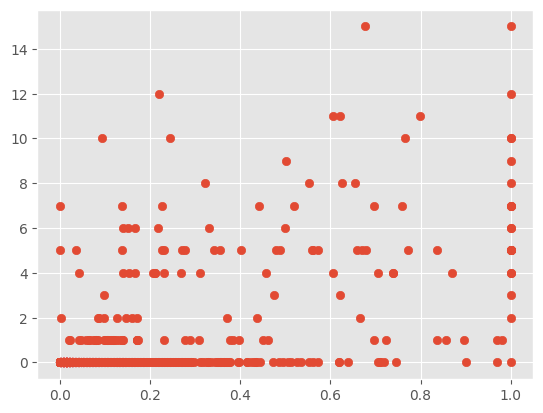

In [49]:
plt.scatter(got['popularity'], got['numdeadrelations'])

корреляции чет не видно

In [50]:
np.corrcoef(got['popularity'], got['numdeadrelations'])[0, 1]

np.float64(0.6149837839198635)

Text(0, 0.5, 'Fuel efficiency')

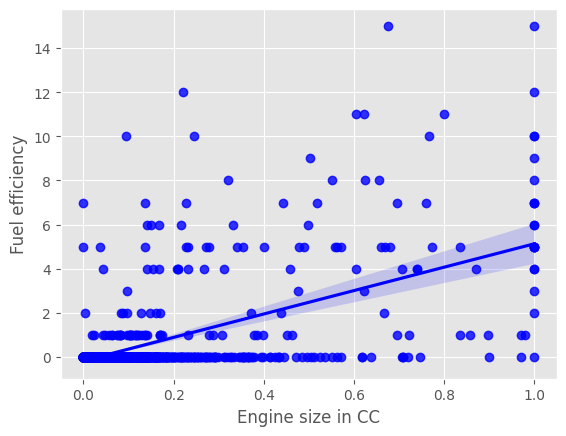

In [51]:
plt.style.use('ggplot') # хочу такой стиль
import seaborn as sns
sns.regplot(
    x='popularity', 
    y='numdeadrelations', 
    data=got,
    color='Blue')
plt.xlabel(
    'Engine size in CC')
plt.ylabel(
    'Fuel efficiency')

In [52]:
import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
import statsmodels.stats.tests.test_influence

In [53]:
model_1 = sm.GLM(
    got["isalive"],
    got["male"],
    family=families.Binomial(),
).fit()
print(model_1.summary())

# Ориентируемся на показатель правдоподобия  - Log-Likelihood

                 Generalized Linear Model Regression Results                  
Dep. Variable:                isalive   No. Observations:                 1946
Model:                            GLM   Df Residuals:                     1945
Model Family:                Binomial   Df Model:                            0
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1254.3
Date:                Fri, 06 Dec 2024   Deviance:                       2508.6
Time:                        22:23:18   Pearson chi2:                 1.95e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            -0.1676
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
male           0.8257      0.063     13.190      0.0

In [54]:
model_2 = sm.GLM(
    got["isalive"],
    got[["male", "ismarried"]],
    family=families.Binomial(),
).fit()
print(model_2.summary())

model_3 = sm.GLM(
    got["isalive"],
    got[["male", "ismarried", "numdeadrelations"]],
    family=families.Binomial(),
).fit()
print(model_3.summary())

model_4 = sm.GLM(
    got["isalive"],
    got[["male", "ismarried", "numdeadrelations", "isnoble"]],
    family=families.Binomial(),
).fit()
print(model_4.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                isalive   No. Observations:                 1946
Model:                            GLM   Df Residuals:                     1944
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1249.0
Date:                Fri, 06 Dec 2024   Deviance:                       2498.0
Time:                        22:23:18   Pearson chi2:                 1.96e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            -0.1613
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
male           0.7780      0.064     12.126      0.0

In [55]:
model_5 = sm.GLM(
    got["isalive"],
    got[["male", "ismarried", "numdeadrelations", "isnoble", "popularity"]],
    family=families.Binomial(),
).fit()
print(model_5.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                isalive   No. Observations:                 1946
Model:                            GLM   Df Residuals:                     1941
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1205.3
Date:                Fri, 06 Dec 2024   Deviance:                       2410.6
Time:                        22:23:18   Pearson chi2:                 1.99e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            -0.1103
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
male                 0.5746      0.081  

видим, что P у popularity высокое и это говорит, что эта переменная незначима => мы можем ее исключить

### Выберем лучшую модель, опираясь на показатель правдоподобия Log-Likelihood. Чем ближе эта метрика к нулю тем лучше модель описывает данные. (model_4) 

In [56]:
model_odds = pd.DataFrame(np.exp(model_4.params), columns= ['Odds Ratio'])
print(model_odds)

                  Odds Ratio
male                1.763928
ismarried           1.496858
numdeadrelations    0.774394
isnoble             1.885640


Давайте их интерпретируем. Если Odds Ratio = 1, то отношения шансов равные для всех классов. Если Odds Ratio > 1, то отношения шансов при повышении значения переменной вырастает. Если Odds Ratio < 1*`, то отношения шансов при повышении значения переменной понижается.

К примеру, если персонаж мужчина — его шанс выжить повышается на 77,6%. Все, что идет после 1 в Odds Ratio можно интерпретировать как проценты.

Диагностика и надежность предсказания модели

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = got[['male', 'ismarried', 'numdeadrelations', 'isnoble', 'popularity']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

            feature       VIF
0              male  1.732705
1         ismarried  1.270200
2  numdeadrelations  1.689705
3           isnoble  1.743861
4        popularity  2.244383


VIF должна быть менее консенсного 4 иначе у нас есть коллинеарность

 Дистанция Кука - это мера, определяющая отклоняющую силу каждого предсказанного значения
 Значение считается влиятельным, если его значение больше 0.5

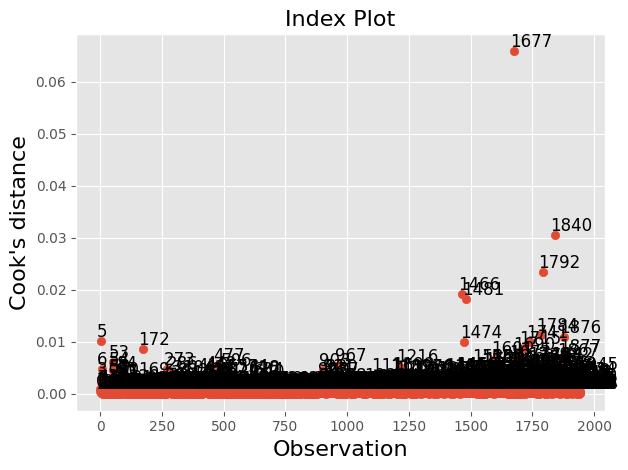

In [58]:
infl = model_5.get_influence()
fig = infl.plot_index(y_var="cooks")
fig.tight_layout()

In [2]:
from scipy import stats
m = stats.bernoulli(p=0.1)
pmf_values = m.pmf(1)
pmf_values


np.float64(0.1)

(0.0, 10.0)

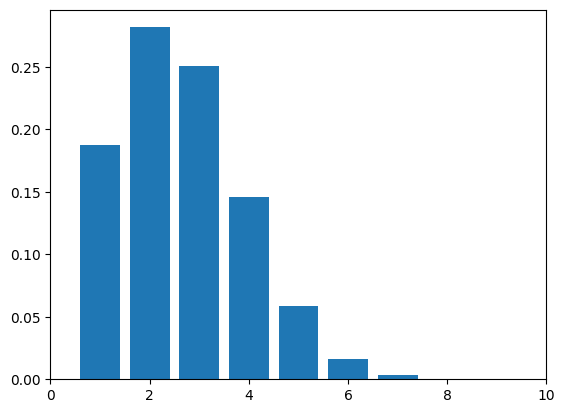

In [17]:
from scipy.stats import binom
n = 10
y = binom(n, p = 0.25)
x = np.arange(1, n)
y = y.pmf(x)
plt.bar(x, y)
# plt.ylim(0, 0.15)
plt.xlim(0, n)




## Решаю логистическую регрессию 


In [61]:
df = pd.read_csv('loan.csv')
df

,Unnamed: 0,Married,Education,LoanAmount,Loan_Status
0,1,1,0,128.0,0
1,2,1,0,66.0,1
2,3,1,1,120.0,1
3,4,0,0,141.0,1
4,5,1,0,267.0,1
...,...,...,...,...,...
475,495,1,0,105.0,1
476,496,1,1,107.0,1
477,497,1,0,111.0,1
478,498,1,0,95.0,1


<Axes: xlabel='Loan_Status'>

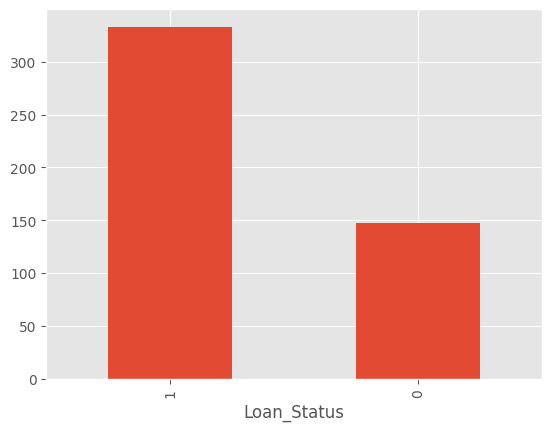

In [62]:
df['Loan_Status'].value_counts().plot(kind='bar')

<Axes: xlabel='Married'>

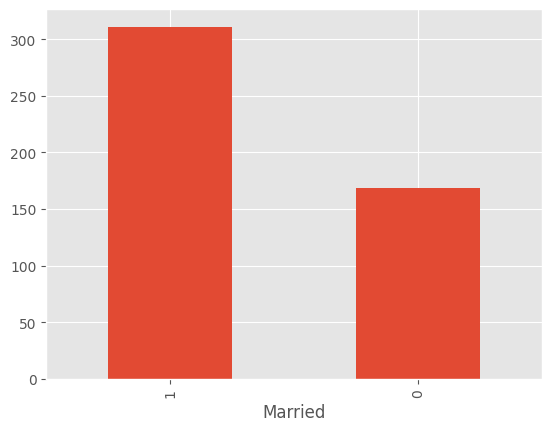

In [63]:
df['Married'].value_counts().plot(kind='bar')

<Axes: xlabel='Education'>

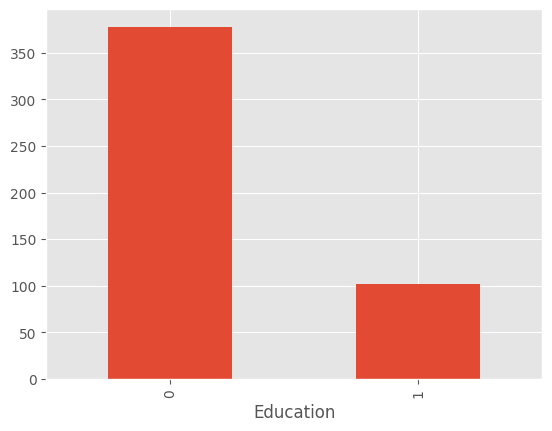

In [64]:
df['Education'].value_counts().plot(kind='bar')

(array([ 74., 262.,  94.,  27.,   9.,   5.,   4.,   1.,   2.,   2.]),
 array([ 17. ,  85.3, 153.6, 221.9, 290.2, 358.5, 426.8, 495.1, 563.4,
        631.7, 700. ]),
 <BarContainer object of 10 artists>)

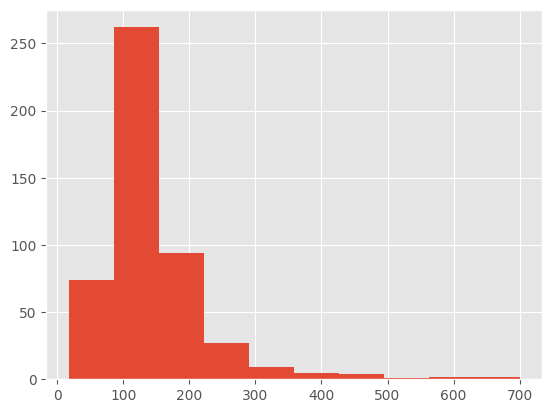

In [65]:
plt.hist(df['LoanAmount'])

Логистическая модель записывается следующим образом: 

sm.GLM(зависимая переменная, независимая переменная, family=families.Binomial()).fit()

In [66]:
import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
import statsmodels.stats.tests.test_influence
model = sm.GLM(df['Loan_Status'], df['LoanAmount'], family=families.Binomial()).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            Loan_Status   No. Observations:                  480
Model:                            GLM   Df Residuals:                      479
Model Family:                Binomial   Df Model:                            0
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -309.91
Date:                Fri, 06 Dec 2024   Deviance:                       619.82
Time:                        22:23:24   Pearson chi2:                     495.
No. Iterations:                     4   Pseudo R-squ. (CS):           -0.06095
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LoanAmount     0.0040      0.001      6.310      0.0

In [67]:
print(np.exp(model.params))

LoanAmount    1.004036
dtype: float64


In [68]:
model = sm.GLM(
    df['Loan_Status'],
    df[['LoanAmount', 'Married', 'Education']],
    family=families.Binomial()
).fit()
print(model.summary())
print(model.summary2())
print(np.exp(model.params))

                 Generalized Linear Model Regression Results                  
Dep. Variable:            Loan_Status   No. Observations:                  480
Model:                            GLM   Df Residuals:                      477
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -300.39
Date:                Fri, 06 Dec 2024   Deviance:                       600.79
Time:                        22:23:24   Pearson chi2:                     482.
No. Iterations:                     4   Pseudo R-squ. (CS):           -0.01970
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LoanAmount     0.0012      0.001      1.362      0.1

Создайте обхект X. Запишите в него все переменные из данных loan.

Показатель VIF рассчитывается с помощью следующих последовательностей:

Создается пустой датафрейм. `vif_data = pd.DataFrame()`
Внутри него создаются колонки с переменными, выделенными в объекте `X`. `vif_data["feature"] = X.columns`
Рассчитывается показатель `VIF` с помощью следующей функции: `vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]`
Выводится таблица со значениями `VIF` при помощи команды `print`.

In [69]:
#Проверяем мультиколлинеарность 
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['LoanAmount','Married','Education']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)


      feature       VIF
0  LoanAmount  2.183028
1     Married  2.294270
2   Education  1.181951


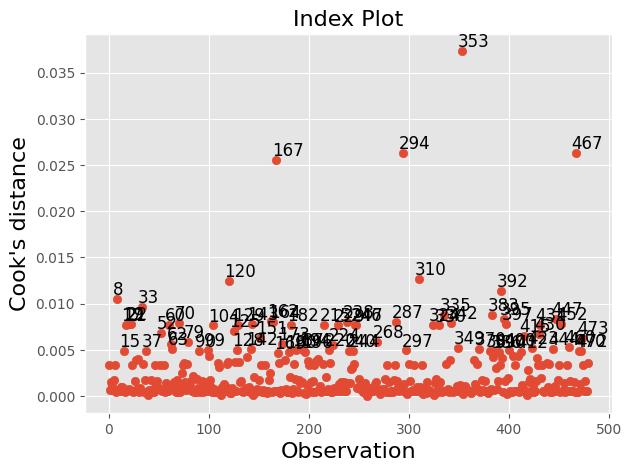

In [70]:
infl = model.get_influence()
fig = infl.plot_index(y_var="cooks", threshold=2 * infl.cooks_distance[0].mean())
fig.tight_layout(pad=1.0)


ROC-кривая


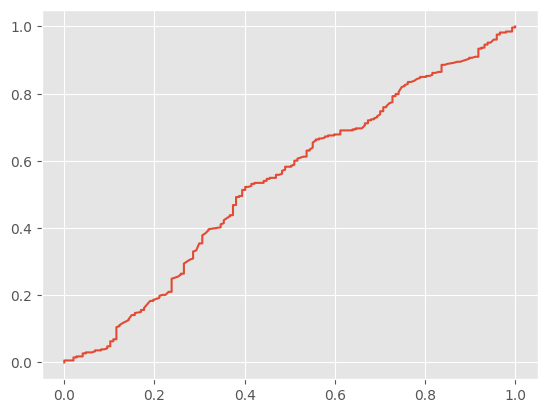

In [71]:
from sklearn.metrics import roc_auc_score, roc_curve
prob_pred = model.predict()
roc_auc_score(df['Loan_Status'], prob_pred)# как классифицируются данные по предсказанным значениям
fpr, tpr, thresholds = roc_curve(pd.to_numeric(df['Loan_Status']), prob_pred) # показатели верноположительных и верноотрицательных значений, предсказанных моделью.
plt.plot(fpr, tpr)


### Текстовые данные

🔍 Стоп-слово — обычно это служебная часть речи, которая употребляется так часто, что отдельное её употребление не вносит в текст какой-то отдельный особенный смысл.

🔍 Токенизация — это разделение текста на единицы, которые будут анализироваться в ходе текстового анализа.

🔍 Лемматизация - идея в том, чтобы привести разные уникальные формы слов к начальной, исходной форме.

🔍 Именованные сущности (named entities) – уникальные идентификаторы сущностей, упомянутых в тексте.

In [72]:
df = pd.read_csv('russian_poetry.csv')
df

,author,date_from,text,name
0,Михаил Лермонтов,1829.0,"Забывши волнения жизни мятежной,\r\nОдин жил в...",Забывши волнения жизни мятежной...
1,Сергей Есенин,1917.0,"Нивы сжаты, рощи голы,\r\nОт воды туман и сыро...","Нивы сжаты, рощи голы..."
2,Игорь Северянин,1919.0,Лючинь печальная читала вечером ручьисто-вкрад...,ЧАРЫ ЛЮЧИНЬ
3,Анатолий Жигулин,1963.0,"Глыбу кварца разбили молотом,\r\nИ, веселым ог...",Золото
4,Николай Тихонов,1937.0,"Хлынул дождь, когда девушки, встав в хоровод,\...",Хоровод в Сульдуси
...,...,...,...,...
16689,Леонид Мартынов,1967.0,Седо\r\nКурчавятся облака\r\nНад чернотою поле...,Ноябрь
16690,Гаврила Державин,1798.0,"Белокурая Параша,\r\nСребророзова лицом,\r\nКо...",Параше
16691,Федор Сологуб,1880.0,"Сладкозвучная богиня,\r\nРифма золотая,\r\nСлу...",Рифма
16692,Илья Эренбург,1924.0,Я так любил тебя — до грубых шуток\r\nИ до так...,Я так любил тебя — до грубых шуток...


In [73]:
df['text'] = df['text'].replace(r'\s+', ' ', regex=True)

### Эксцесс

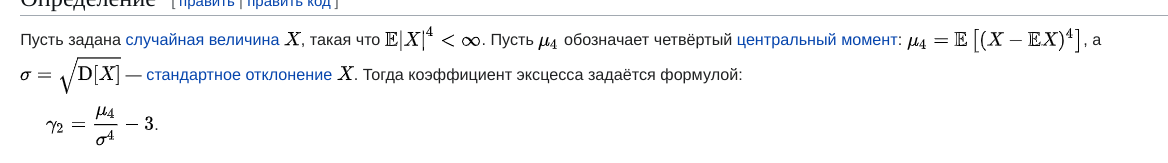

### Графики


In [74]:
memes = pd.read_csv('MEMES_new_short.csv', index_col=0)

In [75]:
memes['Timestamp'] = pd.to_datetime(memes.date_added, utc=True)
memes['Year'] = memes.Timestamp.apply(lambda x: x.year)
memes['Month'] = memes.Timestamp.apply(lambda x: x.month)
memes['Day'] = memes.Timestamp.apply(lambda x: x.day)
memes['Hour'] = memes.Timestamp.apply(lambda x: x.hour)
memes['Weekday'] = memes.Timestamp.apply(lambda x: x.weekday())
memes['days_from_creation'] = (memes.Timestamp.max() - memes.Timestamp)/np.timedelta64(1, 'D')
memes.loc[memes.origin_year == 'Unknown', 'origin_year'] = None
memes.origin_year.isnull().sum()
usl = memes.origin_year.apply(lambda x: str(x).isdigit())

memes.loc[~usl,'origin_year'] = 0
memes.origin_year = memes.origin_year.astype(int)
memes['average_views'] = memes.views/(memes.days_from_creation + 1)
memes['average_comments'] = memes.comments/(memes.days_from_creation + 1)
pd.get_dummies(memes['status'], drop_first=True).head()
memes_dummy = pd.get_dummies(memes)


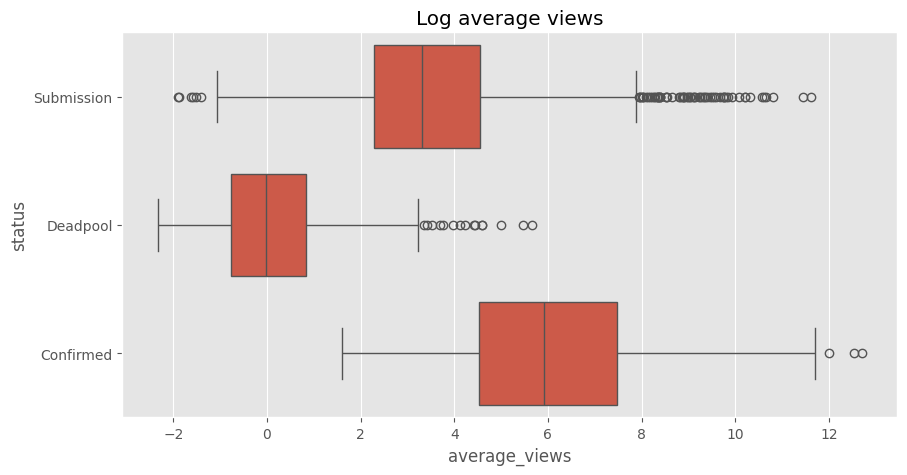

In [76]:
plt.figure(figsize=(10, 5))
sns.boxplot(x = np.log(memes.average_views),y = memes.status)
plt.title("Log average views")
plt.show()

преобразорвание x в log(x) - преобразование бокса-кокса


In [77]:
memes['log_average_views'] = np.log(memes.average_views)

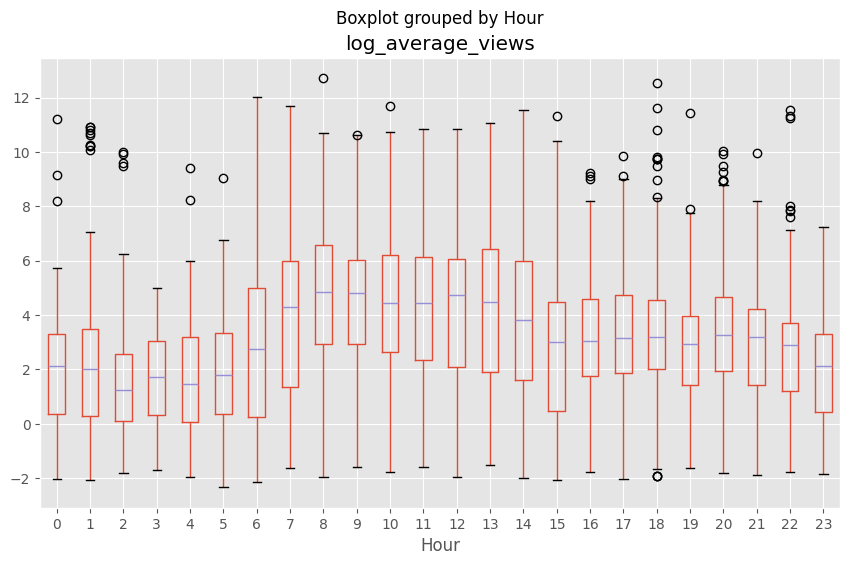

In [78]:
memes.boxplot(column='log_average_views', by='Hour', figsize=(10, 6))
plt.show()

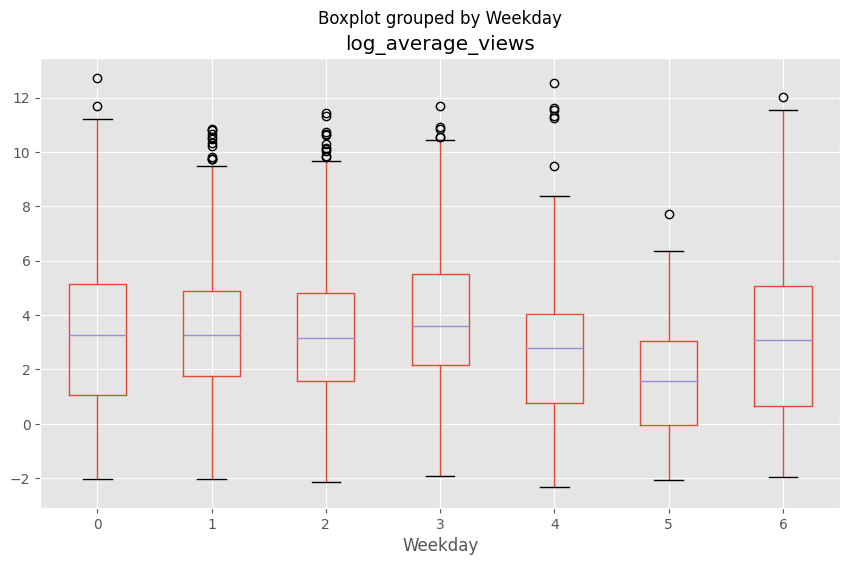

In [79]:
memes.boxplot(column='log_average_views', by='Weekday', figsize=(10, 6))
plt.show()

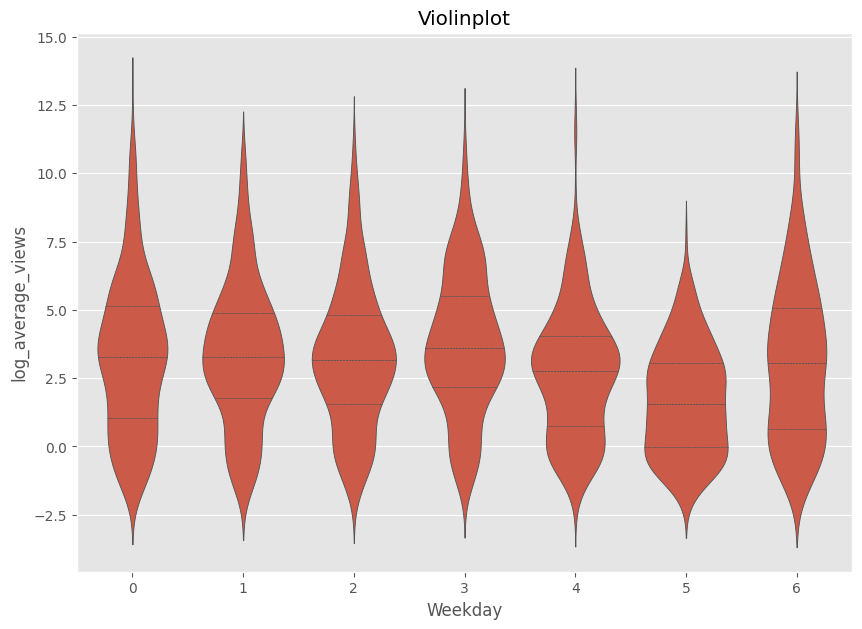

In [80]:
plt.figure(figsize=(10, 7))
sns.violinplot(x='Weekday', y='log_average_views', data=memes, inner="quartile")
plt.title("Violinplot")
plt.show()

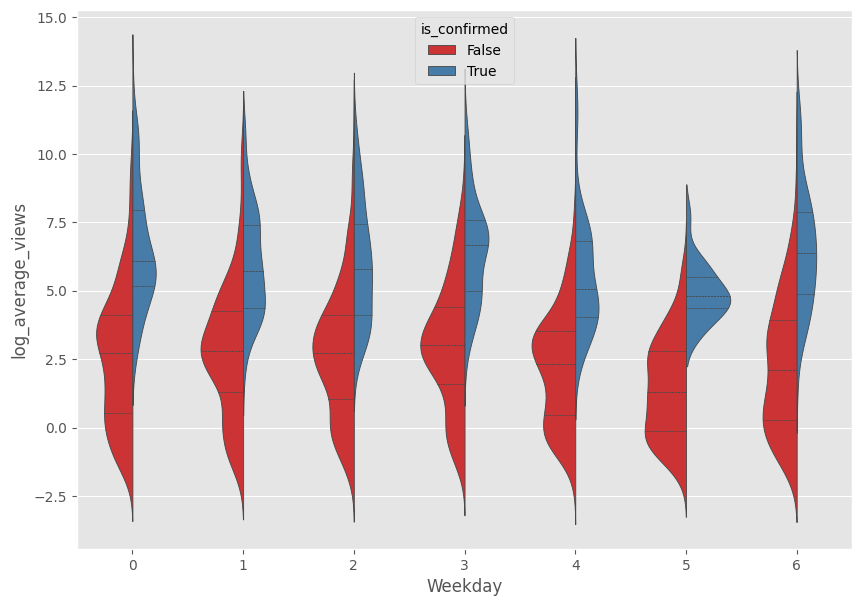

In [81]:
plt.figure(figsize=(10, 7))

memes['is_confirmed'] = memes.status=='Confirmed'

sns.violinplot(x="Weekday", 
                   y="log_average_views", 
                   hue='is_confirmed', 
                   data=memes, 
                   split=True, 
                   palette='Set1', 
                   inner='quartile')
plt.show()

In [82]:
numeric_memes = memes.select_dtypes(include=[np.number])
#оч толковая  штука

/home/nomad/Downloads/mainpy/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


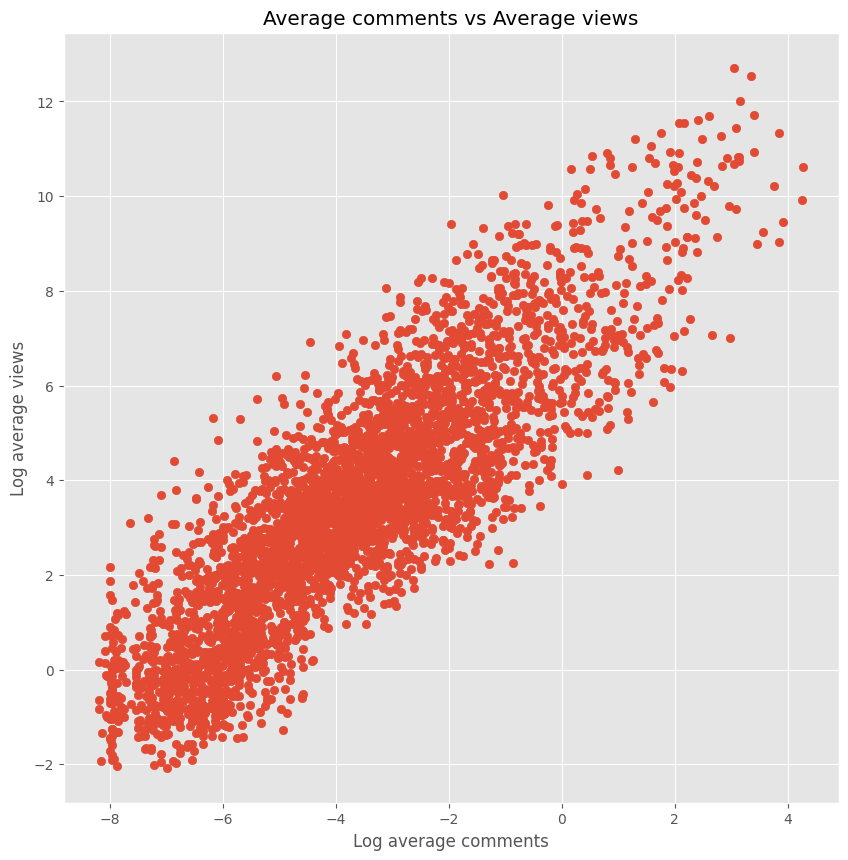

In [83]:
plt.figure(figsize=(10, 10))
plt.scatter(x = np.log(numeric_memes.average_comments),y = np.log(numeric_memes.average_views))
plt.title("Average comments vs Average views")
plt.ylabel("Log average views")
plt.xlabel("Log average comments")
plt.show()

<Axes: >

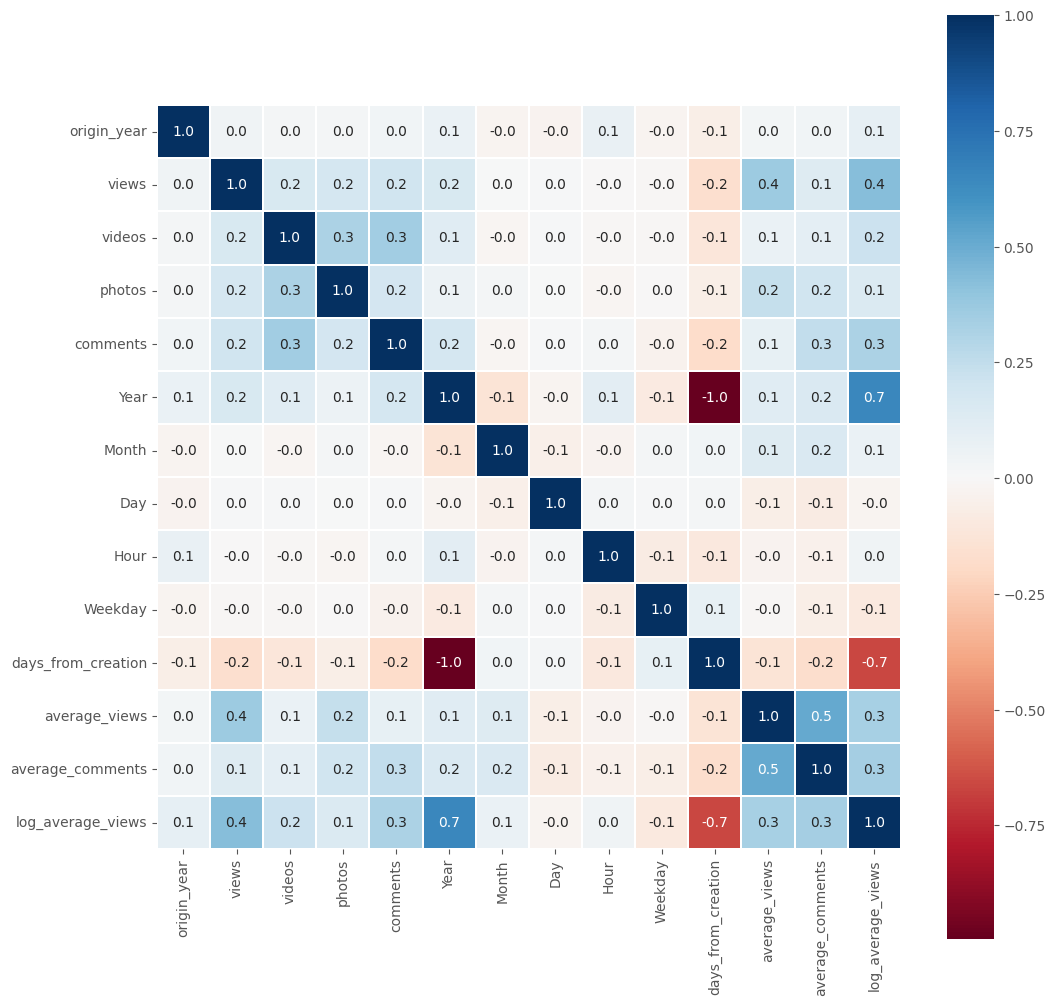

In [84]:
plt.subplots(figsize=(12, 12))

sns.heatmap(numeric_memes.corr( ),
            square=True,
            annot=True, # подпись на квадратах
            fmt=".1f",
            linewidths=0.1,
            cmap="RdBu")
# важно все привести к числам

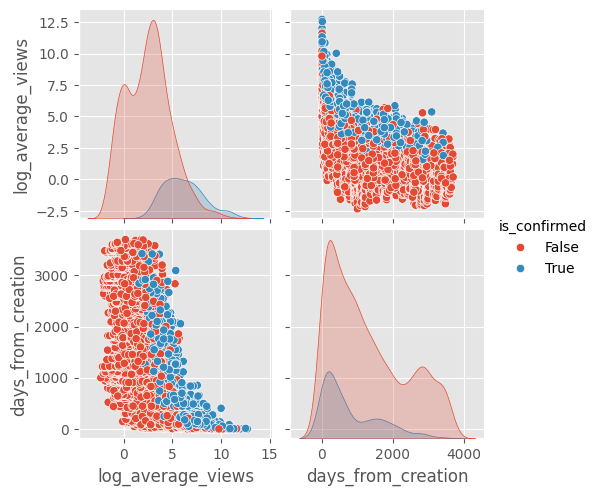

In [85]:
sns.pairplot(
    memes, 
    vars=['log_average_views', 'days_from_creation'],
    hue='is_confirmed'
)

In [86]:
# вот так можно менять стиль для графиков
plt.style.use('ggplot')

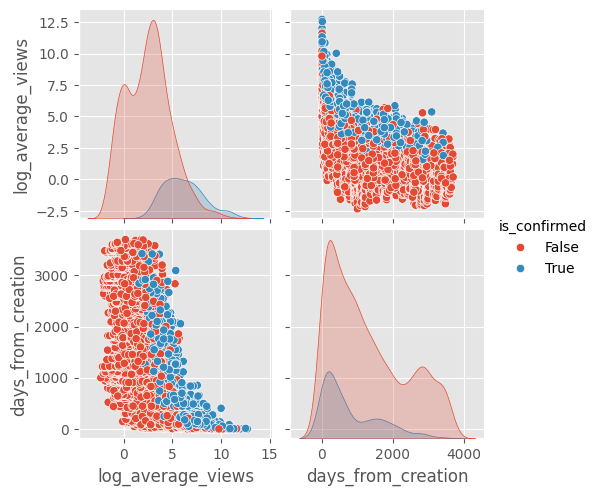

In [87]:
sns.pairplot(
    memes, 
    vars=['log_average_views', 'days_from_creation'],
    hue='is_confirmed'
)

/tmp/ipykernel_107298/672363015.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('google_log.csv', sep='\t')


Text(0.5, 0, 'Логарифм выручки')

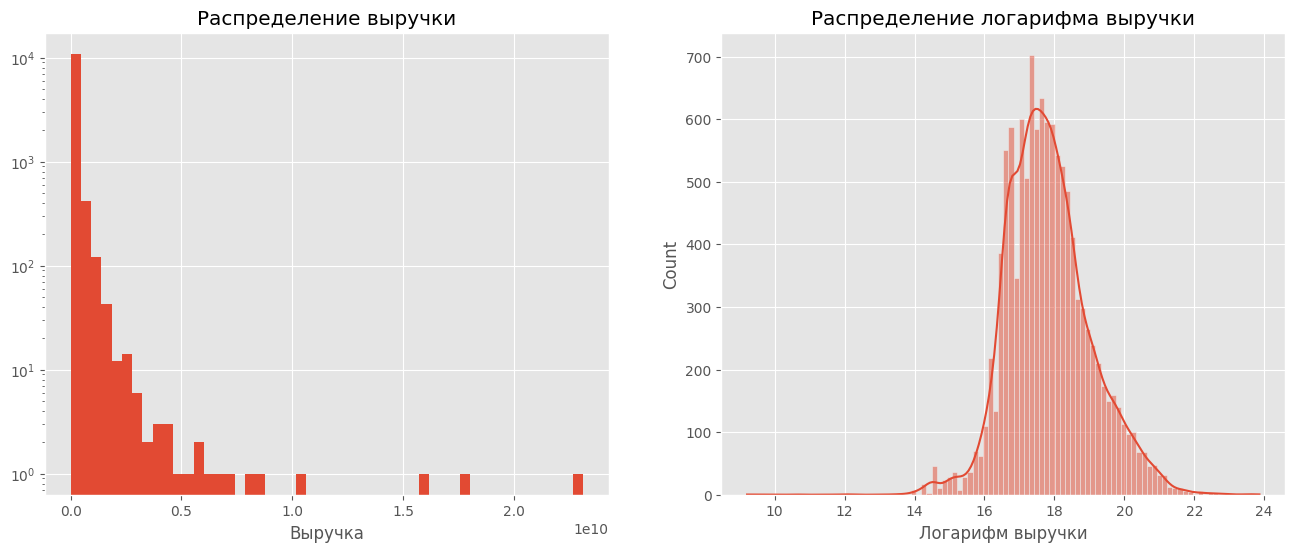

In [88]:
df = pd.read_csv('google_log.csv', sep='\t')
df_buy = df.dropna(subset=['totals.transactionRevenue'])
fig, axes = plt.subplots(1, 2, figsize=(16,6))

df_buy['totals.transactionRevenue'].hist(bins=50, log=True, ax=axes[0])
sns.histplot(
    np.log(df_buy['totals.transactionRevenue'] + 1), 
    ax=axes[1], 
    bins=100, 
    kde=True)

axes[0].set_title("Распределение выручки")
axes[0].set_xlabel("Выручка")

axes[1].set_title("Распределение логарифма выручки")
axes[1].set_xlabel("Логарифм выручки")


<Axes: xlabel='month', ylabel='first_buy_month'>

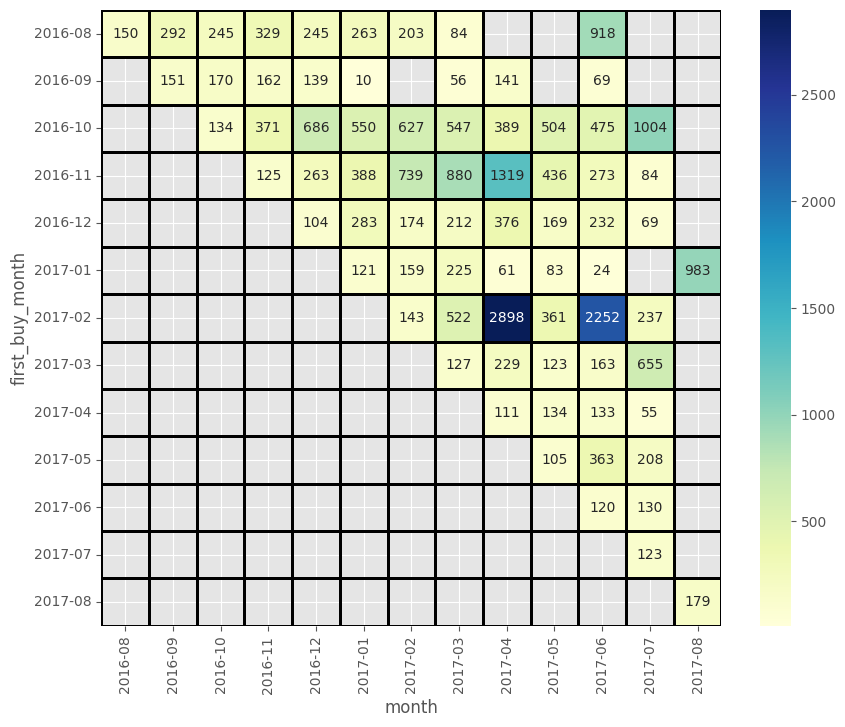

In [89]:
from datetime import datetime
df['totals.transactionRevenue'] = df['totals.transactionRevenue']/10**6 
df["date"] = pd.to_datetime(df["date"], format="%Y%m%d")

df['month'] = df['date'].apply(lambda w: w.strftime('%Y-%m'))
df['ts'] = df['visitStartTime'].apply(lambda x: 
                                      datetime.fromtimestamp(x))
df_buy = df.dropna(subset=['totals.transactionRevenue'])
first_day_buy = (
    df_buy.groupby('fullVisitorId')
    .agg({
        'month':'min',
        'date': 'min',
        'ts': 'min'
    })
)
first_day_buy.columns = ['first_buy_month', 'first_buy_day', 'first_buy_ts']

df_buy = df_buy.join(first_day_buy, on='fullVisitorId')

sales_sum = df_buy.pivot_table(
    index='first_buy_month',
    columns='month',
    values = 'totals.transactionRevenue',
    aggfunc='sum'
)
sales = df_buy.pivot_table(
    index='first_buy_month',
    columns='month',
    values = 'fullVisitorId',
    aggfunc='nunique'
)


plt.figure(figsize=(10, 8))
sns.heatmap(
    sales_sum/sales,
    annot=True,
    fmt='.0f',
    linewidths=1, 
    linecolor='black', 
    cmap="YlGnBu"
)

<Axes: xlabel='count', ylabel='device.deviceCategory'>

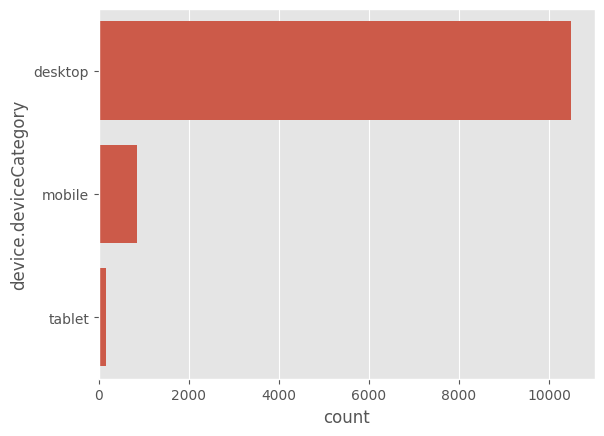

In [90]:
sns.countplot(df_buy["device.deviceCategory"])

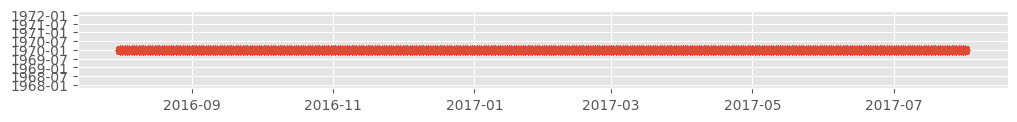

In [91]:
plt.figure(figsize=(12, 1))
plt.scatter(df['date'], np.zeros_like(df['date']))

### ЗБЧ ЦПТ

- $
X \; \char`~  \; N(\mu, \sigma ^2)$ \
нормальное распределение с  $E(X) = \mu$ и $D(X) = \sigma ^ 2 $
- $ X_1, X_2 \dots X_n \sim \; idd(N(0, 1)) -> Y = X_1 ^2 + X_2 ^2 + \dots + X_n ^2 \sim \chi_n ^2$ - хи-квадрат распределение с n степенями свободы 
E(X) = n, \; Var(X) = 2*n  
- Число степеней свободы - количество элементов варьированиям, которые могут принимать произвольные значения, не изменяющие заданных характеристик.

- $X_0 \sim N(0, 1),\: Y \sim \chi_k ^2$ тогда СЛ
$ Z = {\frac{X_0}{\sqrt(Y/k)}} \; \sim \; t(k)$ - распределение Стьюдента с $k-1$ степенями свободы
$E(Z) = 0 \\ Var(Z) = \frac{k}{k - 2} $
- $X \sim \chi_k ^2, Y \sim \chi_m ^2 \\ Z = \frac{\sqrt(X/k)}{\sqrt(Y/m)} \sim F(k, m)$ - распределение Фишера с k, n степенями свободы \
$ E(X) = \frac{m}{m-2} \\ Var(X) = \frac{2m^2(k+m-2)}{n(m-2)^2(m-4)}$

#### Слабая форма ЗБЧ (Чебышев) 
__Теорема__:
$ Пусть \;\; X_1, \ldots X_n \;$  попарно независимы и одинаково распределенные случайные величины с конечной дисперсией $Vax(X_1) < \infty $ тогда 
$$ 
\bar{X} \; =\; \frac{X_1 + \dots +X_n}{n} \stackrel{p}{\to} E(X_1) 
$$
среднее сходится по вероятности к мат.ожид при $n {\Longrightarrow} \infty$

### Cходимость по вероятности.
Последовательность СВ  $X_1, \dots X_n, \dots $ сходится по вероятности к СВ $X$, если
$$\forall \epsilon > 0 \;  P(|X_n - X| < \epsilon) \; \to 0 \; при\;n \to  \;\infty $$
To есть:
$$\lim_{n\to\infty} P(|X_n - X| < \epsilon) = 1$$
обычно: $X_n \stackrel{p}{\to} X$

# Центральная предельная теорема


#### ЦПТ

Пусть $X_1, \ldots, X_n$ случайные величины, имеющие одинаковое распределение с конечными математическим ожиданием и дисперсией. Обычно этот факт записывают вот так:

$$
X_1, \ldots, X_n \sim iid(\mu,\sigma^2)
$$

тогда при $n \to \infty$ имеет место сходимость по распределению: 

$$
\frac{X_1 + \ldots X_n - \mu \cdot n}{\sqrt{n} \sigma } \overset{d}{\to} N(0,1)
$$


__Простым языком:__ 

* При определённых условиях сумма достаточно большого числа случайных величин имеет распределение близкое к нормальному 
* __Главное,__ чтобы случайные величины были похожи и не было такого, что одна резко выделяется на фоне остальных 


### Сходимость по распределению (слабая сходимость)
Последовательность СВ $X_1, \dots, X_n, \dots$ сходится по распределению к СЛ $X$, если 
$$\lim_{n\to\infty} F_{X_n}(x) = F_X (x)$$
то есть последовательность функции распределения $F_{X_n}(x)$ сходится к функции $F_{X}(x)$ во всех точках x, где F_{X} (x) непрерывна

### Сходимость почти наверное (самая сильная)
$$X_n \overset{п.н}{\to} X$$
Последовательность СВ $X_1, \dots, X_n, \dots$ сходится почти наверное (с вероятностью единица) к СЛ X, если $$P(\lim_{n\to\infty}X_n = X) = 1$$ то есть у последовательности есть предел с вероятностью 1

### Сильная форма ЗБЧ (Колмогоров)
__Теорема__: 
Пусть $X_1, \dots. X_n$ последовательность независимых и одинаково распределенных СЛ с $E(|(X_1)|) < \infty$, тогда: $$\bar{X} = \frac{X_1 + \dots + X_n}{n} \overset{п.н}{\to} E(X_1)$$ Среднее сходится почти наверное к математическому ожиданию при $n \to \infty$ 

### Квантильное преобразование
__Теормера__:
Пусть функция распределения $F_x (x)$ непрерывна, тогда СВ $Y =F(x)$ имеет равномерное распределение на отрезке $[0; 1]$
__Доказательство__:
$ F_y(y) = P(Y \leq y) = P(F(X) \leq y) = P(X \leq F^{-1}(y)) = F(F^{-1}( y)) = y $ \
 Функция распределения $F_y (y) = y$, что соответствует равномерному распределению на отрезке $[0; 1]$ 

#### Следствие:

Пусть $Y \sim U[0;1]$, а $F(x)$ произвольная функция распределения. Тогда случайная величина $X = F^{-1}(Y)$ будет иметь функцию распределения $F(x)$.

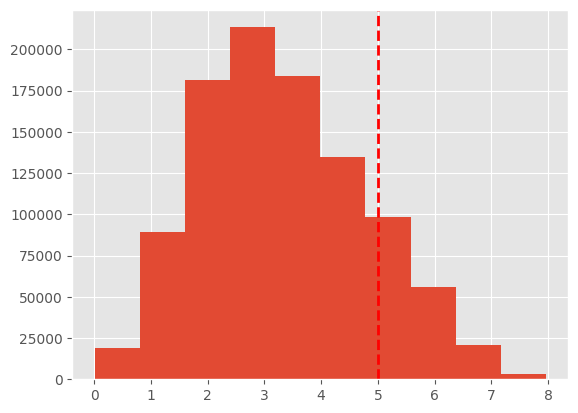

In [92]:
from scipy import stats
import matplotlib.pyplot as plt
n_obs = 10**6

# обратите внимание, что в этой функции задается левая граница и длина
# а не левая и правая границы
uniform_rv = stats.uniform(0, 2)

x_1 = uniform_rv.rvs(n_obs)
x_2 = uniform_rv.rvs(n_obs)
x_3 = uniform_rv.rvs(n_obs)

success = x_1 + x_2 + x_3**2 > 5
success.mean()
plt.hist(x_1 + x_2 + x_3**2)
plt.axvline(x=5, color='red', linestyle='--', linewidth=2, label='Вертикальная прямая')

In [16]:
from scipy import stats
a = stats.binom(n = 10, p=0.25)

Когда конкретный генератор готов, у него можно вызывать разные методы: 

* `rvs` сгенерирует нам выборку из распределения объёма `size`
* `cdf` вычислит для нас значение функции распределения (cumulative distribution function) в указанной точке
* `pdf` вычислит значение плотности распредеелния (probability density function) в указанной точке 
* `ppf` вычислит квантиль, указанного уровня

[В документации](https://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html) можно найти и другие методы, но мы с ними практически не будем встречаться в течение нашего курса (см. разел statistical functions).

In [94]:
a.ppf(0.4995 + 0.5)

np.float64(3.2905267314919255)

Из ЦПТ можно вывести распределение из выборки размера n:$$\bar{X} \sim N(\mu, \frac{\sigma^2}{n})$$ Мы так же можем оценить это при помощи моментов, приравняв выборочные моменты к теоретическим, но в таком случае $\sigma = \hat{\sigma}$ $\newline$ $$\frac{\bar{x} - \mu}{\sqrt{\frac{\hat{\sigma}^2}{n}}} \overset{asm}{\sim} N(0, 1)$$


Доверительный интервал с уровнем значимости $\alpha$ будет
$$
\hat{x} \pm z_{1 - \frac{\alpha}{2}} \cdot \sqrt{\frac{\hat \sigma^2}{n}}
$$

### Доверительный интервал разности
Мы знаем, что $\bar{X} - \bar{Y} \overset{asy}{\sim} N(\mu_x - \mu_y, \frac{\sigma_x^2}{n} + \frac{\sigma_y^2}{m})$ 
потому
$$
\bar{X} - \bar{Y} \pm z_{1-\frac{\alpha}{2}}\sqrt{\frac{{\sigma_x^2}}{n} + \frac{{\sigma_y^2}}{m}}
$$

### Доли
В случае долей мы может определить число наблюдений, чтобы длина доверительного интервала не превышала заранее выбранный диапазон $$\delta = 2 * z_{1-\frac{\alpha}{2}} * \sqrt{\frac{\hat{p}(1 - \hat{p})}{n}}$$
$$n \leqslant \frac{4 * z^2_{1-\frac{\alpha}{2}* \hat{p}(1 - \hat{p})} }{\delta^2}$$ 
$p * (1 - p)$ не превышает $0.25$ и учитывая эту оценку сверху мы можем получить необходимое значение n $$n = \frac{z^2_{1-\frac{\alpha}{2}}}{\delta^2}$$

Изображение доверительного интервала для rpu

/tmp/ipykernel_107298/3862912428.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  visits = pd.read_csv('marketing_log_1.csv', sep='\t')


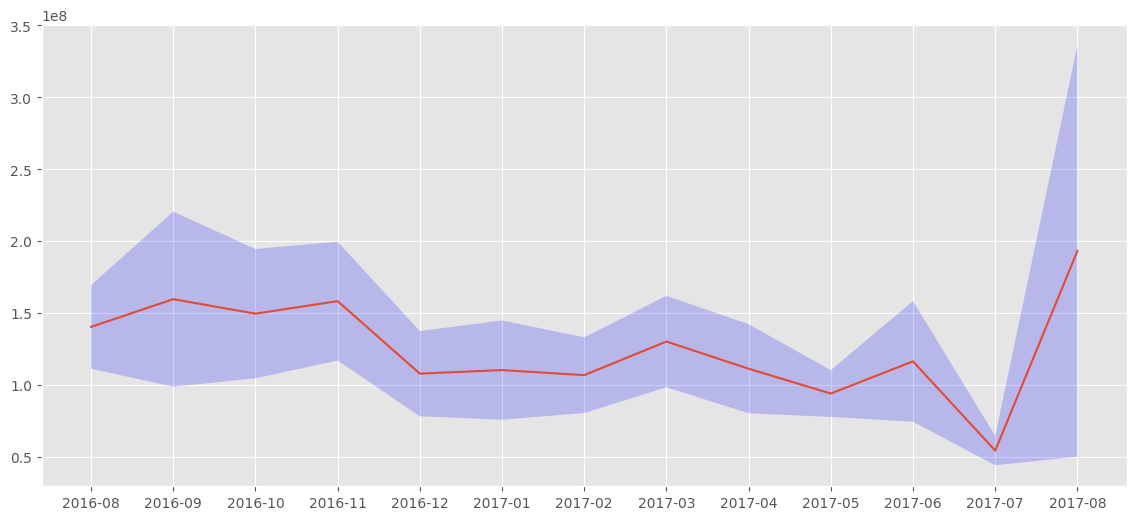

In [97]:
visits = pd.read_csv('marketing_log_1.csv', sep='\t')

# изменим тип колонки с датой на время
visits['date'] = pd.to_datetime(visits["date"], format="%Y-%m-%d")
# будем строить RPU на месячной основе
visits['month'] = visits['date'].apply(lambda w: w.strftime('%Y-%m'))

purchases = visits.dropna(subset=['transactionRevenue'])
purchases.shape

datePurchases = (
    visits.groupby('month')['transactionRevenue']
    .agg([('rpu', 'mean'),
          ('count', 'count'),
          ('se', 'std')])
    .reset_index()
)
alpha = 0.05

# границы интервалов
q = stats.norm.ppf(1 - alpha/2)
datePurchases['left'] = datePurchases['rpu'] - q * datePurchases['se']/np.sqrt(datePurchases['count'])
datePurchases['right'] = datePurchases['rpu'] + q * datePurchases['se']/np.sqrt(datePurchases['count'])

datePurchases['rpu'].plot(figsize=(14,6))
plt.fill_between(datePurchases['month'], datePurchases['left'], datePurchases['right'], 
                 facecolor='blue', alpha=0.2, interpolate=True)
plt.show()

Через ММ мы можем получить разные функции от $\bar X$: $\frac{1}{\bar X}, \; \sqrt{3*\bar{X}}$ и хотим понять как $g(x) \overset{asy}{\sim} \:?$ \
__Дельта метод__: \
$X_1, \dots, X_n \sim iid(\mu, \sigma^2)$ \
$g(t) - дифф.$ тогда, \
$g(\bar{X}) \overset{asy}{\sim} N(g(\mu), \frac{\sigma^2}{n} * g'(\mu) ^2)$


# ПОСМОТРЕТЬ РАСПРЕДЕЛЕНИЕ ФУНКЦИИ ОТ СЛУЧАЙНОЙ ВЕЛИЧИНЫ

### Свойства оценок
1. __Несмещенность__. Оценка называется несмещенной, если $$E(\hat \theta) = \theta$$ Смещение оценки это разница между ее математическим ожиданием и ее реальным значением: $$bias(\hat \theta)=E(\hat \theta) - \theta$$ Или проще: если при фиксированном n мы постоянно используем нашу оценку, в среднем мы не ошибаемся
2. __Состоятельность__. \
Оценка называется состоятелной, если она сходится по вероятности к истинному значению параметра при $n \overset{p}{\to} \infty$ $$\hat \theta \overset{p}{\to} \theta$$ Или проще: чем больше наблюдений, тем ближе мы к истине
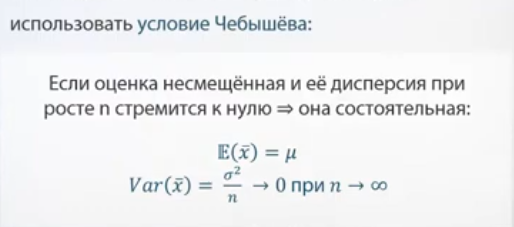
3. __Асимптотическая несмещенность__. \
Оценка называется асиптотически несмещенной, если ее математическое ожидание сходится к оцениваемому параметру при $n \overset{p}{\to} \infty$ $$E(\hat \theta) \to \theta$$

несмещённость это свойство оценки при фиксированном размере выборки $n$. Оно означает, что ошибка "в среднем", то есть при систематическом использовании оценки, отсутствует. Это довольно хорошее свойство, но не обязательное. Достаточно, чтобы смещение оценки уменьшалось с ростом объёма выборки. Такая оценка называется асимптотически несмещённой. 

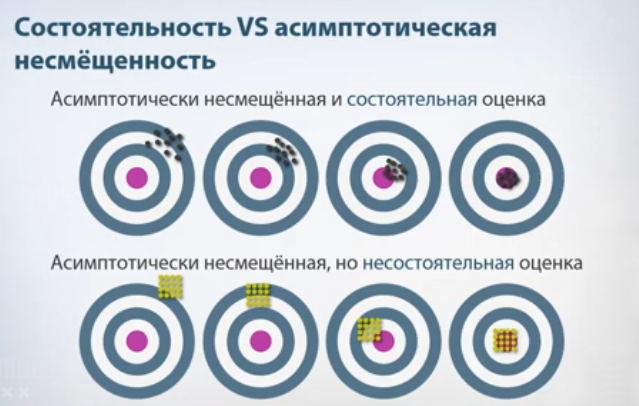

#### Сравнение оценок. 
Обычно оценки между собой сравнивают с помощью квадратичной ошибки: $$MSE = E(\hat \theta - \theta)^2$$ Если не смещенная, то $MSE=Var(\hat \theta)$

__кратко__ 
* __несмещённость__ (при фиксированном размере выборки мы в среднем не ошибаемся) 
* __состоятельность__ (при бесконечном расширении выборки мы приходим к истинному значению)
* __эффективность__ (у нашей оценки самая маленькая дисперсия для её класса (например, для всех несмещенных оценок))

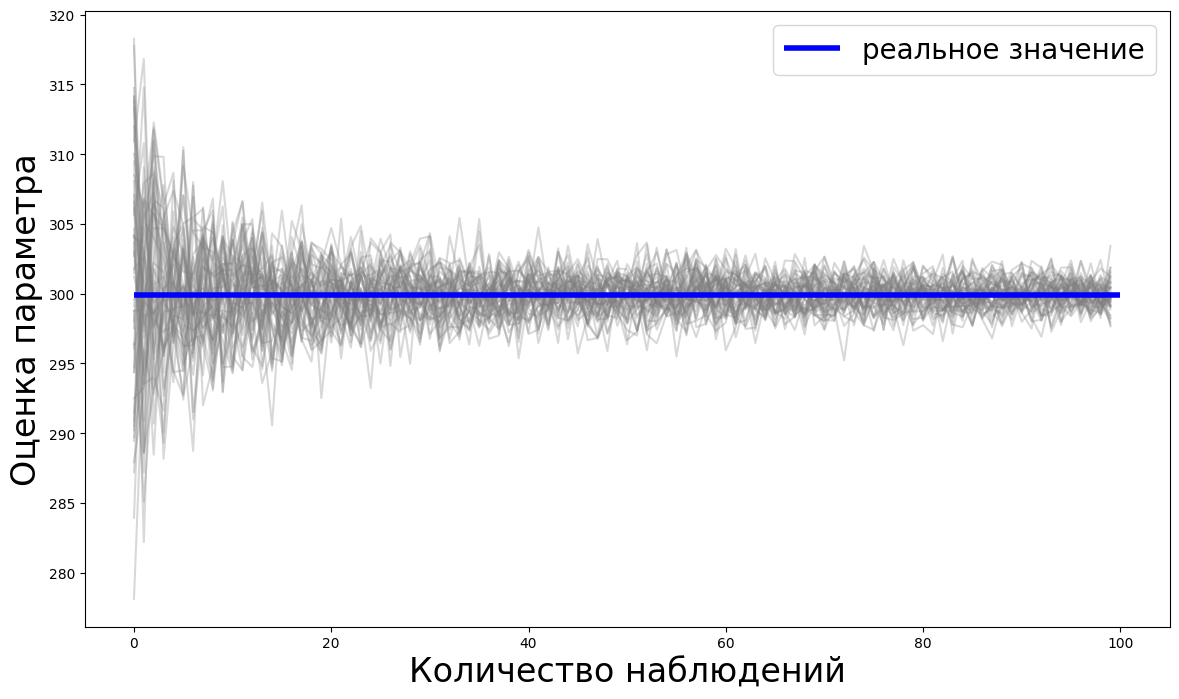

In [19]:
norm_rv = stats.norm(loc=300, scale=100)

# вся генеральная совокупность 
x_mamont = norm_rv.rvs(size = 10**6)

theta_real = np.mean(x_mamont) # настоящее среднее
theta_real

theta_hat = np.zeros((100, 50))

for n in range(100, 10100, 100): # поднимаемся выше и видим больше мамонтов
    
    # 50 выборок с повторениями для простоты 
    x_sample = np.random.choice(x_mamont, size = (n, 50), replace=False)
    
    # 50 разных оценок 
    x_mean = np.mean(x_sample, axis=0) 
    
    theta_hat[n//100 - 1] = x_mean                # состоятельная
    # theta_hat[n//100 - 1] = (x_mean - 4200/n)     # состоятельная
    # theta_hat[n//100 - 1] = (x_mean - 5*(n+1)/n)   # несостоятельная 
    
    
plt.figure(figsize=(14,8))
plt.plot(theta_hat, c='grey', alpha = 0.3)

plt.xlabel('Количество наблюдений', size=24)
plt.ylabel('Оценка параметра', size=24)

plt.hlines(theta_real, 0, 100, color='blue', lw=4, label='реальное значение')
plt.legend(fontsize=20);    

#### Эффективность 

Предположим, что у нас есть две оценки. Они обе классные, несмещённые и состоятельные. Возникает вопрос: а какую взять то? Для того, чтобы выбрать, вводят свойство эффективности. 

__Определение:__ Оценка $\hat \theta$ параметра $\theta$ называется __эффективной в некотором классе оценок,__ если её дисперсия, $Var(\hat \theta)$ в этом классе оценок, при заданном объёме выборке минимальна. 

Зачем это нужно? Для того, чтобы доверительные интервалы для оценок были как можно уже, то есть для того, чтобы оценка была как можно точнее.

$X_1, \dots, X_n \sim iid(\mu, \sigma^2)$ \

Предполагаем, что это неплохие оценки показателей:
* $\hat \mu = \bar x$
* $\hat \sigma ^2 = \frac{\sum(x_i - \bar x)^2}{n}$ \
`несмещенность - ?` 
- $E(\bar x) = E(\frac{x_1, + \dots + x_n}{n}) = \frac{E(x_1) + \dots + E(x_n)}{n} = \frac{n * \mu}{n} = \mu$-`несмещеная` 
- $E(\hat \sigma ^2) = E(\bar{x^2}) - E(\bar x^2)$\
$E(\bar{x^2}) = E(\frac{x_1 ^2 + \dots + x_n ^2}{n}) = \frac{E(x_i ^2) * n}{n} = E(x_i ^2)$ \
$E(\bar x^2) = E((\frac{x_1, + \dots + x_n}{n})^2) = \frac{E(x_1 + \dots + x_n)^2}{n^2} = \frac{n * E(x_i ^2) + 2*\sum{x_i*x_j, (i!=j) }}{n^2} =  \frac{ E(x_i ^2) + 2* \frac{n*(n-1)}{2} * \mu ^2}{n} = \frac{ E(x_i ^2) + (n-1) * \mu ^2}{n}$ \
$E(\hat \sigma ^2) = E({x_i ^2}) - \frac{ E(x_i ^2) - (n-1) * \mu ^2}{n} = \frac{n - 1}{n} * (E(x_i ^2) - E^2 (x_i))$ \
$= \frac{n - 1}{n} * Var(x_i)$ -`смещена` \
__НО!__ $\frac{n}{n-1} * \hat \sigma ^2 = S^2$ - `не смещена`

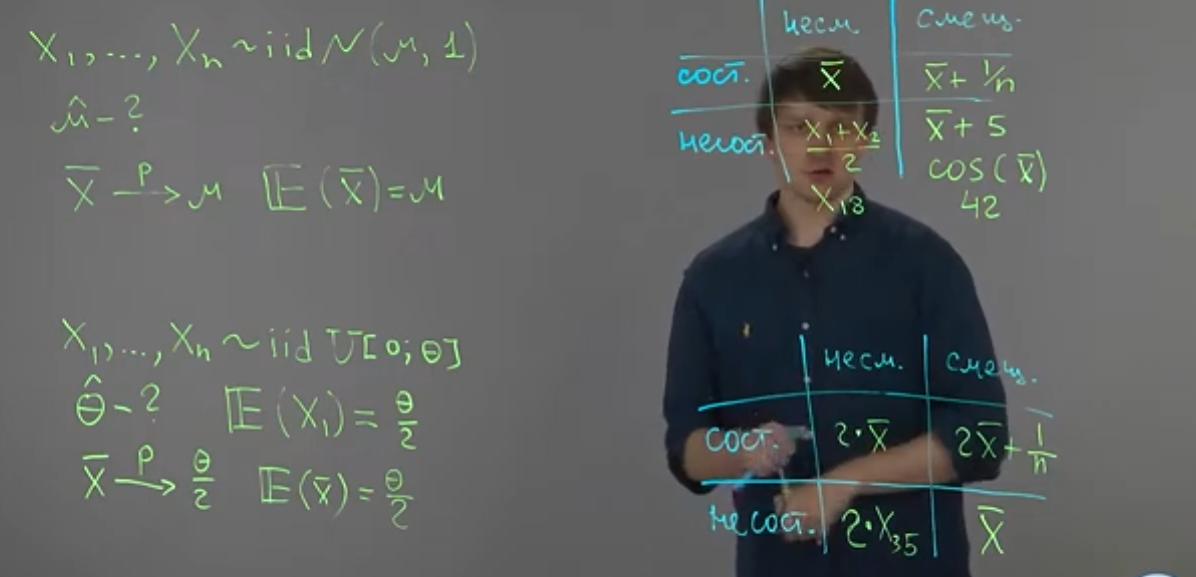

__Сравнение оценок__
* `MSE`. Для немещенных оценок совпадает с дисперсией оценки. Чем более предсказуема оценка, тем точнее прогноз (доверительный интервал). Мы можем представить в виде суммы смещения и разброса. Bias-variance decomposition 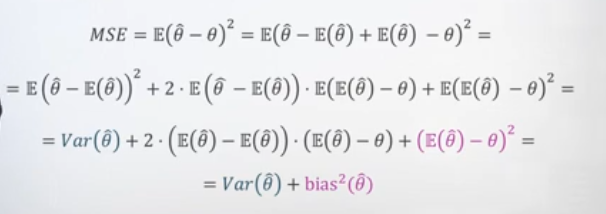

__Регуляризация__ \
$Y_1, Y_2, Y_3 \sim iid(\mu, \sigma^2)$ \
$\hat{Y_4} - ?. \; \; \hat{\mu} = \gamma * (y_1 +y_2 + y_3)$ 
- $\gamma: \; \; \hat{\mu} - несмещенная$
- $\gamma:  \; \; \hat{\mu} - min \; \; MSE$

$E(\hat{\mu}) =  3 * \gamma * \mu$ \
$Var(\hat{\mu}) = \gamma^2 * 3 * \sigma^2$ \
1. $E(\hat \mu) = \mu \to \gamma = 1/3$
2. $MSE  = Var(\hat \mu) + bias^2()\hat \mu$ \
$MSE = \gamma ^2 * 3 * \sigma ^2 + (\gamma * 3 * \mu - \mu)^2 \to min_\gamma$ \
$MSE`_\gamma = 2* \gamma * 3 * \sigma^2 + 3 \mu * 2 *(\gamma*3 * \mu - \mu) = 0$ \
$\gamma = \frac{1}{3 + \frac{\sigma^2}{\mu^2}}$ И ее нельзя посчитать на практике, так как мы не знаем сигму и мю, мы лишь их оцениваем.
3. $Пусть \;ошибка\; это :\sum{(y_i - \hat \mu)^2} + \lambda * \hat \mu^2 \to min_{\hat \mu}$ - Сумма среднеквадратических потерь + штраф
$\hat \mu = \frac{\sum{y_i}}{3+\lambda}$ \
$\lambda = 0 \to 1.$ \
$\lambda = \frac{\sigma^2}{\mu^2} \to 2.$   

Можно зафиксировать смещение и найти оценку с наименьшей дисперсией - таковая называется __эффективной__ в классе с $bias(\hat \theta)$. Проще: ищем наименьший доверительный интервал в своем классе

### Неравенство Рао-Фреше-Крамера
Если у нас есть несмещенная оценка параметра и выполнены условия регулярности:
1. Область определения СЛ не зависит от параметра $\theta$ Не выпоняется, например для $U(0, \theta)$
2. Можно брать производные
3. Должна существовать информация Фишера.
Тогда неравенство гласит, что $Var(\hat \theta) \geq \frac{1}{n * j(\theta)}. \; j(\theta)$ - информация Фишера. И если дисперсия совпадает с нижней границей, то оценка эффективна \
$Var(\hat \theta) \geq \frac{(1 + bias`_\theta)^2}{n * j(\theta)} $- для смещенных оценок.

$J_1(P) = E(\frac{\delta ln( f(x, p))}{\delta p})^2$

## Доверительные интервалы

__Предсказательный интервал__:
* СЛ $X \sim F(x)$
* Предсказательный интервал уровня $1 -\alpha$: $$P(X_{\frac{\alpha}{2}} \leq X \leq X_{1 - \frac{\alpha}{2}}) = 1 - \alpha$$
* Для $X \sim N(\mu, \sigma ^2)$ пресказательным интервалом будет: $$P(\mu - z_{\frac{\alpha}{2}} * \sigma \leq X \leq \mu +  z_{1 - \frac{\alpha}{2}} * \sigma) = 1 - \alpha$$
`(!)` границы ДИ - константы
* $\bar X \sim N(\mu, \frac{\hat \sigma ^2}{ n}) \to$ предсказательный интервал для $\bar X$:
$$P(\mu - z_{\frac{\alpha}{2}} * \frac{\hat \sigma}{\sqrt n} \leq X \leq \mu +  z_{1 - \frac{\alpha}{2}} * \frac{\hat \sigma}{\sqrt n}) = 1 - \alpha$$
* Доверительный интервал для $\mu$: $$P(\bar x - z_{\frac{\alpha}{2}} * \frac{\hat \sigma}{\sqrt n} \leq \mu \leq \bar x+  z_{1 - \frac{\alpha}{2}} * \frac{\hat \sigma}{\sqrt n}) = 1 - \alpha$$  И вот тут границы интервала это уже СВ

Интервал $[\theta_L, \theta_U]$ называется __доверительным интервалом__ для параметра $\theta$, с уровнем доверия $1 - \alpha$, если при бесконечном повторении эксперимента в $100 * (1 - \alpha)$ в процентах случаев этот интервал покрывает истинное значение $\theta$ 


Величину $\alpha$ называют __уровнем значимости__

Почему можно заменить $\sigma \; на \; \hat \sigma $ ?
По ЦПТ: $$\frac{\bar{x} - \mu}{\sqrt\frac{\sigma ^2}{n}} \overset{p}{\to} N(0, 1) \; при \; n \to \infty$$
Домножим и числитель и знаменатель на $\sqrt\frac{\hat \sigma ^2}{n}$. Т.к. $\hat \sigma ^2$ состоятельная оценка $\sigma ^2, \; \hat \sigma ^2 \overset{p}{\to} \sigma ^2$. А значит, что $\frac{\sqrt\frac{\hat \sigma ^2}{n}}{\sqrt\frac{\sigma ^2}{n}} \overset{p}{\to} 1$. Сходимость по вероятности это более сильная сходимость, чем сходимость по распределению, а значит она сходится и по распределению, а значит замена не меняет асимптотику.

$s^2$ можно выразить через средние. $$s^2 \sim N(\sigma ^2, \frac{\mu_4 - \sigma^4}{n})$$ где  $\mu_4 = E[(X_i - \mu)^4]$

Для маленьких выборок ЦПТ и норм. распр. не подходит, так как это основывается на асимптотике. Нужны точные союзники

Строим ДИ для $\mu$:
1. $X_1, \dots, X_n \sim iid \;\;N(\mu, \sigma ^2), \sigma^2$ известна. распределение точное, ЦПТ использовать не нужно: $$\hat \mu = \bar x = \frac{X_1 + \dots + X_n}{n} \sim N(\mu, \frac{\sigma ^2}{n})$$
2. $\sigma$ неизвестна:
$\frac{\hat x - \mu}{\sqrt\frac{s^2}{n}} \sim ???$
Союзник: хи-квадрат, Стьюдент.


#### __Теорема Фишера:__
Пусть $X_1, \dots X_n \sim iid \; N(0, 1)$, тогда
1. Выборочное среднее $\bar x$ и дисперсия $s^2$ независимы
2. $\frac{(n - 1) * s^2}{\sigma^2}$ имеет $\chi ^2$ - распределение с $n - 1$ степенью свободы


2. Дисперсия неизвестна. 
$$\frac{\hat x - \mu}{\sqrt\frac{s^2}{n}} = \frac{\hat x - \mu}{\sqrt\frac{s^2}{n}} * \frac{\sqrt\frac{\sigma ^ 2}{(n -1)}}{\sqrt\frac{\sigma ^ 2}{(n -1)}}$$
$$\frac{\hat x - \mu}{\sqrt\frac{\textcolor{red}{\sigma^2}}{n}} * \frac{\sqrt\frac{\sigma ^ 2}{(n -1)}}{\sqrt\frac{\textcolor{red}{s ^ 2}}{(n -1)}}$$ 
Первый множитель имеет N(0, 1) распределение
$$\frac{\sqrt\frac{\sigma ^ 2}{(n -1)}}{\sqrt\frac{s ^ 2}{(n -1)}} = \frac{1}{\sqrt\frac{(n - 1) * s^2}{(n - 1)*\sigma ^2}} = \frac{1}{\sqrt{\textcolor{red}{\frac{(n - 1) * s^2}{\sigma ^2}}}/(n-1)}$$ 
$\textcolor{red}{\chi^2_{n-1}}$ по Т.Фишера.
То есть мы получаем $$N(0, 1)/\sqrt{\chi^2_{n-1}/(n-1)} = t(n - 1)$$

То есть, если выборка распределена нормально, а дисперсия неизвестна, то:
$$\frac{\hat x - \mu}{\sqrt\frac{s^2}{n}} \sim t(n-1)$$
$$P(\bar x - t_{1-\frac{\alpha}{2}} * \frac{s}{\sqrt{n}} \leq \mu \leq \bar x + t_{1-\frac{\alpha}{2}} * \frac{s}{\sqrt{n}}) = 1- \alpha$$

$t(n) \overset{d}{\to} N(0, 1)$, при $n \to \infty$

__Асимптотический доверительный интервал:__

$$
\bar x \pm z_{1 - \frac{\alpha}{2}} \cdot \sqrt{\frac{\hat\sigma^2}{n}}.
$$

> __Предположения:__ 
В выборке нет аномалий, собиралась независимо, тогда среднее асимптотически нормально распределено (ЦПТ) 

__Точный доверительный интервал:__

$$
\bar x \pm t_{1 - \frac{\alpha}{2}} \cdot \sqrt{\frac{\hat\sigma^2}{n}}.
$$

> __Предположения:__ 
Выборка пришла из нормального распределения, дисперсия неизвестна

#### Прикольная визуализация для ДИ
`errorbar`

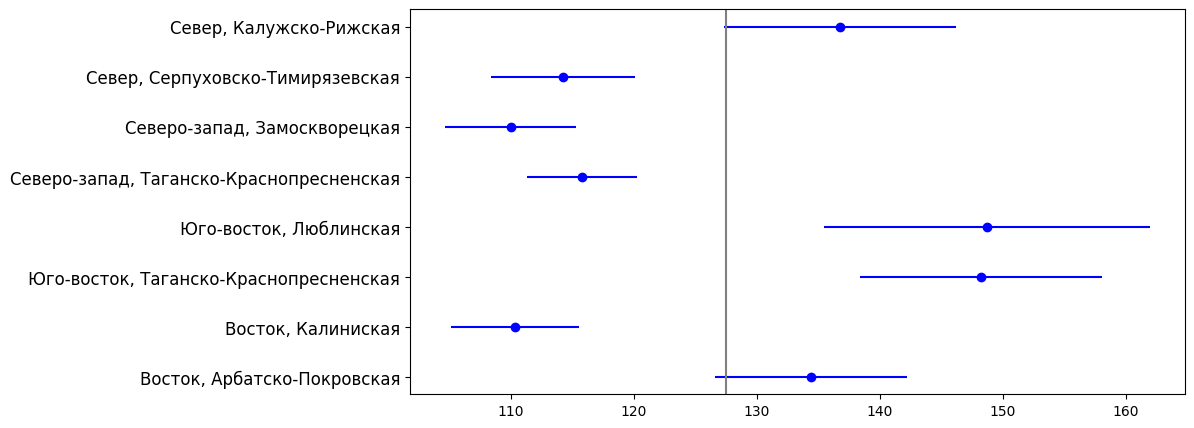

In [57]:
df = pd.read_csv('flat.csv', sep='\t')
df_agg = df.groupby('code')['price'].agg(['mean', 'std', 'count'])

alpha = 0.01
df_agg['t_crit'] = df_agg['count'].apply(lambda w: stats.t(w - 1).ppf(1 - alpha/2))

# на сколько отступать вправо и влево от математического ожидания
df_agg['step'] =  df_agg['t_crit']  * df_agg['std']/np.sqrt(df_agg['count'])

district = [
    'Север, Калужско-Рижская', 'Север, Серпуховско-Тимирязевская', 
    'Северо-запад, Замоскворецкая', 'Северо-запад, Таганско-Краснопресненская', 
    'Юго-восток, Люблинская', 'Юго-восток, Таганско-Краснопресненская',
    'Восток, Калиниская', 'Восток, Арбатско-Покровская'
]

center = df_agg['mean'].values
step = df_agg['step'].values

mu_hat = df.price.mean() # общее среднее 

plt.figure(figsize=(10,5))

plt.errorbar(center, np.arange(center.size),  xerr = step, 
             capsize=0, fmt="o", color="blue")

plt.yticks(np.arange(center.size - 1, -1, -1), district, fontsize=12);
plt.axvline(mu_hat, 0, color='grey');

Построим $95\%$ асимптотический доверительный интервал для разницы в средних. Предполагаем $X_i, \;Y_i$ независимы и одинаково распределены, число наблюдений велико, выбросов нет.
$$ \frac{\bar x - \bar y - (\mu_x -\mu_y)}{\sqrt{\frac{\hat \sigma_x ^2}{n_x} + \frac{\hat \sigma_x ^2}{n_x}}} \overset{asy}{\sim} N(0, 1) 
$$

$$
\bar x - \bar y \pm z_{crit} \cdot \sqrt{\frac{\hat\sigma_x^2}{n_x} + \frac{\hat\sigma_y^2}{n_y}}
$$

$X_i \sim \; iid \;N(\mu, \sigma_x ^2) \;\;\; Y_i \sim iid\;N(\mu, \sigma_y ^2)$ \
Нас интересует величина 
$$ \frac{\bar x - \bar y - (\mu_x -\mu_y)}{\sqrt{\frac{\hat \sigma_x ^2}{n_x} + \frac{\hat \sigma_x ^2}{n_x}}}$$ 

1. Дисперсии известны: $\sim \; N(0, 1)$
2. Дисперсии неизвестны, но равны: 
$$ \frac{\bar x - \bar y - (\mu_x -\mu_y)}{\sqrt{\frac{\textcolor{red} {s ^2}}{n_x} + \frac{\textcolor{red} {s ^2}}{n_x}}} \sim t(n_x + n_y - 2)$$
Объединенная оценка дисперсии $\textcolor{red} {s ^2} = \frac{(n_x - 1) s_x ^2 + (n_y - 1)s_y ^2}{n_x + n_y - 2}$ \
3. Дисперсии неизвестны, различаются:
Проблема Беренца-Фишера.
$\sim t(v)$ 
$$v = \frac{(\frac{s_x ^2}{n_x} + \frac{s_y ^2}{n_y})^2}{\frac{s_x ^4}{n_x ^2 (n_x - 1)} + \frac{s_y ^ 4}{n_y ^2 (n_y - 1)}}$$ 
Распределение приближенное (распределение Уэлча)
Условие: $n_x = n_y$, либо  между $n_x$ и $n_y$ такой же как между $\sigma_x$ и $\sigma_y$

#### Разность средних (выборки зависимы)
$X_i \sim \; iid \;N(\mu_x, \sigma_x ^2) \;\;\; Y_i \sim iid\;N(\mu_y, \sigma_y ^2)$ 
* измерения делаются на одних и тех же объектах
* Можем посмотреть прирост на отдельных объектах: $d_i = X_i - Y_i$, $\bar x - \bar y = \bar{x}\bar{-}\bar{y}$  
Получаем ситуацию с распределением Стьюдента, где $$S^2 = \frac{1}{n - 1} * \sum (d_i - \bar d)^2$$
$\hat x \pm t_{1 - \frac{\alpha}{2}} * \frac{S}{\sqrt{n}}$

#### Точные ДИ для дисперсии

$X_1, \dots X_n \sim iid \; N(\mu, \sigma ^2)$
1. $\mu$ известна

$$s^2 = \frac{1}{n} \sum (X_i - \mu)^2 = $$ 
под суммой находится $[N(0, \sigma ^2)]$ и это надо как-то свести к $\chi_n ^2$
$$\frac{\sigma ^2}{n} \sum \frac{(X_i - \mu)^2}{\sigma ^2} = \frac{\sigma ^2}{n} \chi_n ^2$$ 
Под суммой теперь $[N(0, 1)/\sigma]^2$

Перекидываем $n, \; \sigma$ в левую часть. И по Т.Фишера
$$ \frac{n * s^2}{\sigma ^2} = \sum \frac{(X_i - \mu)^2}{\sigma ^2} \sim \chi_n ^2$$
И так мы можем построить ДИ для дисперсии

$$P(\chi_n ^2 (\frac{\alpha}{2}) \leq \frac{n * s^2}{\sigma ^2} \leq \chi_n ^2 (\frac{1 - \alpha}{2})) = 1 - \alpha$$

$F(n, m)$ не симметрично!!!

$$P(\frac{n * s^2}{\chi_n ^2 (1 - \frac{\alpha}{2})} \leq \sigma ^2 \leq \frac{n * s^2}{\chi_n ^2 (\frac{\alpha}{2})}) = 1 - \alpha$$

2. Если мы не знает $\mu$, то мы просто используем оценку $\bar X$, но нам нужен новый союзник. И нам поможет Т.Фишера (2):
$$\frac{(n - 1)*s^2}{\sigma ^2} \sim \chi_{n - 1} ^2$$
одна степень свободы ушла в оценку мат.ожадание. 
$$P(\chi_{n - 1} ^2 (\frac{\alpha}{2}) \leq \frac{(n - 1) * s^2}{\sigma ^2} \leq \chi_{n - 1} ^2 (\frac{1 - \alpha}{2})) = 1 - \alpha$$
$$P(\frac{ (n - 1)* s^2}{\chi_{n - 1} ^2 (1 - \frac{\alpha}{2})} \leq \sigma ^2 \leq \frac{n * s^2}{\chi_{n - 1} ^2 (\frac{\alpha}{2})}) = 1 - \alpha$$